# Proyecto Python Fundamentals
## Telemetria Almacen Entregable Sep 2022
### Objetivo.

* Analizar dataset con datos de los tiempos de armado de pedidos en Almacenes Mexico con un solo dia de información, para luego replicar en los 31 dias, ya que la carga del folder se toma mas de 1 hora.
* <b> Un dia representa aprox 190mil registros, que serian al mes 5,130,000 registros - 1hr50min de carga en dataframe</b>
### Antecedentes.
* En los almacenes de México los tiempos de armado no estaban monitoreados para conocer las areas de oportunidad que se debian atacar para tener una operacion estandarizada y controlada con respecto al servicio de armado y registro del surtido de los pedido comerciales.
* En los ultimos 12 meses se han implementado en los almacenes una serie de desarrollos para agilizar y estandarizar las actividades de armado y registro del surtido de los pedidos.

### Espectivas del analisis
* Comprobar que la implementacion de los nuevos desarrollos en almacenes ha contribuido a la estandarizacion de las toneladas por minuto de armado de pedidos.
* Cuanto se tarda cada almacenista en armar un pedido
* Que productos son los que toman mas tiempo en surtir
* Que sucursales tienen los mejores y los peores tiempos de surtido




## <u>Carga de Librerias y Dataset</u>

In [9]:
# Librerias
import pandas as pd # manejo de datos
import glob # manejo de archivos
import os # control de sistema operativo
from timeit import default_timer # medicion de tiempos
import math # funciones matematicas
import numpy as np # funciones matematicas
from datetime import datetime, timedelta
import matplotlib.pyplot as plt # gestionar graficos
%matplotlib inline
import warnings # eliminar warnings
warnings.filterwarnings('ignore')

bold = '\33[1m' # para imprimir texto en bold
normal = '\33[m' # para imprimir texto normal


In [10]:
# Opciones display de Pandas para mostrar toda la informacion
pd.set_option('display.max_columns',None) # muestra todas las columnas


In [11]:
# Se crea el dataset para explorar los datos que contiene
url = 'C:\\Users\\cmoreno\\Desktop\\Folder Telemetria Pickings\\20220801 Telemetria YTMMMX_APICK_DET 01 Ago 2022.XLSX'
df = pd.read_excel(url)
df.head(2)

,Md.,PsEx,FeEntreg,Nº pers.,Entrega,ZonaTrab.,Pos.,Material,Tiempo Surtido Teorico,Texto breve de material,Destinat.,Comentario,TPos,Cantidad entrega,UM,Cantidad Maxima,Int2,Int2.1,Estatus,Doc.modelo,PosMod,Ce.,Alm.,UMB,Peso bruto,Un,Lote,SjL,Contador,Carácter 1,Contador.1,Int2.2,Cantidad entrega.1,Cantidad en Piezas,Fecha Surtido,Hora Inicio surtido,Fecha Surtido.1,Hora Fin Surtido,Diferencia,Clave Falla,Carácter 1.1,Ruta,Consecutivo,Fecha Contabilización Recurrente,Hora Contabilización Reccurrente,Brigada,Auditado,Modif.el,HoraModif,Modif.por
0,800,503,2022-08-01,225338,3462187809,NaN,10,507,1,SALCHICHON 4.2KG CHX,0000400434,PUBLICO EN GENERAL VA(CUAF30).,ZCRN,350.0,ST,350.0,70,0,G,2.987285e+09,10,503,503,KG,1470.0,KG,NaN,X,139,NaN,2,1,0,350.0,NaT,00:00:00,NaT,00:00:00,0,NaN,NaN,F30,0,NaN,00:00:00,NaN,NaN,2022-08-01,12:59:37,STORRES
1,800,503,2022-08-01,225338,3462187809,NaN,20,60010000,1,CANASTILLA,0000400434,PUBLICO EN GENERAL VA(CUAF30).,ZTAL,1.0,CS,1.0,1,0,G,2.987285e+09,20,503,503,ST,1.0,KG,NaN,NaN,763,NaN,630,1,0,1.0,NaT,00:00:00,NaT,00:00:00,0,NaN,NaN,F30,0,NaN,00:00:00,NaN,NaN,2022-08-01,12:59:37,STORRES


In [12]:
# Se muestra la forma del DataFrame
df.shape

(181866, 50)

### Comentarios:
1. Se observa que el dataset tiene 181mil columnas, y que las columnas de fechas y hora necesarias para calcular los tiempos de armado de pedidos estan separadas, por lo que se va a cargar de nuevo el dataset juntanto esas columnas desde el proceso de carga.

In [13]:
# Se crea el dataset CARGANDO LAS COLUMNAS DE FECHA Y HORA COMO FECHA PARSEADA
url = 'C:\\Users\\cmoreno\\Desktop\\Folder Telemetria Pickings\\20220801 Telemetria YTMMMX_APICK_DET 01 Ago 2022.XLSX'
df = pd.read_excel(url, parse_dates=[['Fecha Surtido','Hora Inicio surtido'], ['Fecha Surtido.1', 'Hora Fin Surtido']])
df.head()

,Fecha Surtido_Hora Inicio surtido,Fecha Surtido.1_Hora Fin Surtido,Md.,PsEx,FeEntreg,Nº pers.,Entrega,ZonaTrab.,Pos.,Material,Tiempo Surtido Teorico,Texto breve de material,Destinat.,Comentario,TPos,Cantidad entrega,UM,Cantidad Maxima,Int2,Int2.1,Estatus,Doc.modelo,PosMod,Ce.,Alm.,UMB,Peso bruto,Un,Lote,SjL,Contador,Carácter 1,Contador.1,Int2.2,Cantidad entrega.1,Cantidad en Piezas,Diferencia,Clave Falla,Carácter 1.1,Ruta,Consecutivo,Fecha Contabilización Recurrente,Hora Contabilización Reccurrente,Brigada,Auditado,Modif.el,HoraModif,Modif.por
0,00:00:00,00:00:00,800,503,2022-08-01,225338,3462187809,NaN,10,507,1,SALCHICHON 4.2KG CHX,0000400434,PUBLICO EN GENERAL VA(CUAF30).,ZCRN,350.0,ST,350.0,70,0,G,2.987285e+09,10,503,503,KG,1470.00,KG,NaN,X,139,NaN,2,1,0,350.0,0,NaN,NaN,F30,0,NaN,00:00:00,NaN,NaN,2022-08-01,12:59:37,STORRES
1,00:00:00,00:00:00,800,503,2022-08-01,225338,3462187809,NaN,20,60010000,1,CANASTILLA,0000400434,PUBLICO EN GENERAL VA(CUAF30).,ZTAL,1.0,CS,1.0,1,0,G,2.987285e+09,20,503,503,ST,1.00,KG,NaN,NaN,763,NaN,630,1,0,1.0,0,NaN,NaN,F30,0,NaN,00:00:00,NaN,NaN,2022-08-01,12:59:37,STORRES
2,2022-08-01 00:00:00 14:22:50,2022-08-01 00:00:00 14:23:12,800,503,2022-08-01,225338,3462195769,NaN,10,2307,13,SALCHICHA ASAR ORIGINAL 1.2 KG,0000317110,WALMART (1623 CD CUAUHTEMOC),ZTAN,0.0,ST,2.0,0,2,T,2.987260e+09,10,503,503,KG,0.00,KG,NaN,X,309,NaN,103,1,0,2.0,0,NaN,NaN,T56,0,NaN,00:00:00,NaN,NaN,2022-08-01,12:59:01,STORRES
3,2022-08-01 00:00:00 14:24:30,2022-08-01 00:00:00 14:25:29,800,503,2022-08-01,225338,3462195769,NaN,20,2339,13,SALCHICHON REB CHIMEX 400 GRS,0000317110,WALMART (1623 CD CUAUHTEMOC),ZTAN,131.0,ST,131.0,3,17,T,2.987260e+09,20,503,503,KG,52.40,KG,NaN,X,319,NaN,165,1,0,131.0,0,NaN,NaN,T56,0,NaN,00:00:00,NaN,NaN,2022-08-01,12:59:01,STORRES
4,2022-08-01 00:00:00 14:22:24,2022-08-01 00:00:00 14:22:27,800,503,2022-08-01,225338,3462195769,NaN,30,557,13,SALCHICHA POLACA QUESO/JALAPEÑO CHX,0000317110,WALMART (1623 CD CUAUHTEMOC),ZTAN,1.0,ST,1.0,0,1,T,2.987260e+09,30,503,503,KG,0.35,KG,NaN,X,153,NaN,71,1,0,1.0,0,NaN,NaN,T56,0,NaN,00:00:00,NaN,NaN,2022-08-01,12:59:01,STORRES


### Comentarios:
1. Se cargaron las fechas y horas juntas correctamente, en la fase de preprocessing se corregiran los issues del dataset (información a reemplazar, columnas a eliminar, y registros con nulos etc)

## <u>Preprocessing</u>

In [14]:
# EL PARSEO DE FECHAS PUSO EL DATO DE FECHA CON HORA '00:00:00', SE ELIMINA ESE VALOR CREANDO UNA COLUMNA NUEVA
df['Fecha Inicio Surtido'] = df['Fecha Surtido_Hora Inicio surtido'].str.replace('00:00:00','')
df['Fecha Fin Surtido'] = df['Fecha Surtido.1_Hora Fin Surtido'].str.replace('00:00:00','')
df.head()

,Fecha Surtido_Hora Inicio surtido,Fecha Surtido.1_Hora Fin Surtido,Md.,PsEx,FeEntreg,Nº pers.,Entrega,ZonaTrab.,Pos.,Material,Tiempo Surtido Teorico,Texto breve de material,Destinat.,Comentario,TPos,Cantidad entrega,UM,Cantidad Maxima,Int2,Int2.1,Estatus,Doc.modelo,PosMod,Ce.,Alm.,UMB,Peso bruto,Un,Lote,SjL,Contador,Carácter 1,Contador.1,Int2.2,Cantidad entrega.1,Cantidad en Piezas,Diferencia,Clave Falla,Carácter 1.1,Ruta,Consecutivo,Fecha Contabilización Recurrente,Hora Contabilización Reccurrente,Brigada,Auditado,Modif.el,HoraModif,Modif.por,Fecha Inicio Surtido,Fecha Fin Surtido
0,00:00:00,00:00:00,800,503,2022-08-01,225338,3462187809,NaN,10,507,1,SALCHICHON 4.2KG CHX,0000400434,PUBLICO EN GENERAL VA(CUAF30).,ZCRN,350.0,ST,350.0,70,0,G,2.987285e+09,10,503,503,KG,1470.00,KG,NaN,X,139,NaN,2,1,0,350.0,0,NaN,NaN,F30,0,NaN,00:00:00,NaN,NaN,2022-08-01,12:59:37,STORRES,,
1,00:00:00,00:00:00,800,503,2022-08-01,225338,3462187809,NaN,20,60010000,1,CANASTILLA,0000400434,PUBLICO EN GENERAL VA(CUAF30).,ZTAL,1.0,CS,1.0,1,0,G,2.987285e+09,20,503,503,ST,1.00,KG,NaN,NaN,763,NaN,630,1,0,1.0,0,NaN,NaN,F30,0,NaN,00:00:00,NaN,NaN,2022-08-01,12:59:37,STORRES,,
2,2022-08-01 00:00:00 14:22:50,2022-08-01 00:00:00 14:23:12,800,503,2022-08-01,225338,3462195769,NaN,10,2307,13,SALCHICHA ASAR ORIGINAL 1.2 KG,0000317110,WALMART (1623 CD CUAUHTEMOC),ZTAN,0.0,ST,2.0,0,2,T,2.987260e+09,10,503,503,KG,0.00,KG,NaN,X,309,NaN,103,1,0,2.0,0,NaN,NaN,T56,0,NaN,00:00:00,NaN,NaN,2022-08-01,12:59:01,STORRES,2022-08-01 14:22:50,2022-08-01 14:23:12
3,2022-08-01 00:00:00 14:24:30,2022-08-01 00:00:00 14:25:29,800,503,2022-08-01,225338,3462195769,NaN,20,2339,13,SALCHICHON REB CHIMEX 400 GRS,0000317110,WALMART (1623 CD CUAUHTEMOC),ZTAN,131.0,ST,131.0,3,17,T,2.987260e+09,20,503,503,KG,52.40,KG,NaN,X,319,NaN,165,1,0,131.0,0,NaN,NaN,T56,0,NaN,00:00:00,NaN,NaN,2022-08-01,12:59:01,STORRES,2022-08-01 14:24:30,2022-08-01 14:25:29
4,2022-08-01 00:00:00 14:22:24,2022-08-01 00:00:00 14:22:27,800,503,2022-08-01,225338,3462195769,NaN,30,557,13,SALCHICHA POLACA QUESO/JALAPEÑO CHX,0000317110,WALMART (1623 CD CUAUHTEMOC),ZTAN,1.0,ST,1.0,0,1,T,2.987260e+09,30,503,503,KG,0.35,KG,NaN,X,153,NaN,71,1,0,1.0,0,NaN,NaN,T56,0,NaN,00:00:00,NaN,NaN,2022-08-01,12:59:01,STORRES,2022-08-01 14:22:24,2022-08-01 14:22:27


In [15]:
# Se comprueba el tipo de dato de las columnas nuevas y se comprueban los valores 
print(bold,"Tipos de Datos de Columnas Nuevas:\n",normal, df[['Fecha Inicio Surtido','Fecha Fin Surtido']].dtypes)
df[['Fecha Inicio Surtido','Fecha Fin Surtido']].head()

 Tipos de Datos de Columnas Nuevas:
  Fecha Inicio Surtido    object
Fecha Fin Surtido       object
dtype: object


,Fecha Inicio Surtido,Fecha Fin Surtido
0,,
1,,
2,2022-08-01 14:22:50,2022-08-01 14:23:12
3,2022-08-01 14:24:30,2022-08-01 14:25:29
4,2022-08-01 14:22:24,2022-08-01 14:22:27


### Comentarios:
1. Las 2 columnas se crearon correctamente y como tipo objeto
2. Existen valores nullos y vacios, este issue se resuleve en los siguientes pasos

In [16]:
# LA DEPURACION DE '00:00:00' DEJO ESPACIOS EN CADA VALOR, SE TIENEN QUE ELIMINAR PARA CONVERTIR A DATETIME

# Quitar los esapcios dentro de los valores para poder convertir a datetime
df['Fecha Inicio Surtido'] = df['Fecha Inicio Surtido'].str.strip()
df['Fecha Fin Surtido'] = df['Fecha Fin Surtido'].str.strip()

# Se convierten los valores sin espacios en tipo datetime
df['Fecha Inicio Surtido'] = pd.to_datetime(df['Fecha Inicio Surtido'])
df['Fecha Fin Surtido'] = pd.to_datetime(df['Fecha Fin Surtido'])

# Se comprueba el resultado
print(df[['Fecha Inicio Surtido','Fecha Fin Surtido']].dtypes)
df[['Fecha Inicio Surtido','Fecha Fin Surtido']].head()

Fecha Inicio Surtido    datetime64[ns]
Fecha Fin Surtido       datetime64[ns]
dtype: object


,Fecha Inicio Surtido,Fecha Fin Surtido
0,NaT,NaT
1,NaT,NaT
2,2022-08-01 14:22:50,2022-08-01 14:23:12
3,2022-08-01 14:24:30,2022-08-01 14:25:29
4,2022-08-01 14:22:24,2022-08-01 14:22:27


In [17]:
# Se quitan las columnas que no se necesitan INCLUYENDO LAS DE LAS FECHAS PARSEADAS, YA SE TIENEN COLUMNAS NUEVAS
cols_drop = ['Md.','PsEx','ZonaTrab.','Pos.','TPos','Cantidad Maxima','Int2','Int2.1','PosMod','UMB','Lote',
             'SjL','Contador','Carácter 1','Contador.1','Int2.2','Diferencia','Clave Falla','Carácter 1.1',
             'Consecutivo','Fecha Contabilización Recurrente','Hora Contabilización Reccurrente','Brigada',
             'Auditado','Modif.el','HoraModif','Modif.por','Fecha Surtido_Hora Inicio surtido',
             'Fecha Surtido.1_Hora Fin Surtido']

# Se crea un nuevo DataFrame con las columnas a trabajar
df_final = df.drop(cols_drop, axis=1)
df_final.head(3)

,FeEntreg,Nº pers.,Entrega,Material,Tiempo Surtido Teorico,Texto breve de material,Destinat.,Comentario,Cantidad entrega,UM,Estatus,Doc.modelo,Ce.,Alm.,Peso bruto,Un,Cantidad entrega.1,Cantidad en Piezas,Ruta,Fecha Inicio Surtido,Fecha Fin Surtido
0,2022-08-01,225338,3462187809,507,1,SALCHICHON 4.2KG CHX,0000400434,PUBLICO EN GENERAL VA(CUAF30).,350.0,ST,G,2.987285e+09,503,503,1470.0,KG,0,350.0,F30,NaT,NaT
1,2022-08-01,225338,3462187809,60010000,1,CANASTILLA,0000400434,PUBLICO EN GENERAL VA(CUAF30).,1.0,CS,G,2.987285e+09,503,503,1.0,KG,0,1.0,F30,NaT,NaT
2,2022-08-01,225338,3462195769,2307,13,SALCHICHA ASAR ORIGINAL 1.2 KG,0000317110,WALMART (1623 CD CUAUHTEMOC),0.0,ST,T,2.987260e+09,503,503,0.0,KG,0,2.0,T56,2022-08-01 14:22:50,2022-08-01 14:23:12


In [18]:
# Se cuenta con la columna 'Estatus', se revisa cuantos valores de Estatus existen, para trabajar
# unicamente con las entregas Terminadas
df_final['Estatus'].unique()

array(['G', 'T', 'F', 'A', 'S', 'E', 'D', 'P'], dtype=object)

In [19]:
# Se filtra el DataFrame para dejar solo registros con estatus 'T'
df_final = df_final[df_final['Estatus'] == 'T']
# Se comprueba el resultado del filtrado
df_final['Estatus'].unique()

array(['T'], dtype=object)

In [20]:
# Se revisa si existen datos nulos
df_final.isnull().sum()

FeEntreg                       0
Nº pers.                       0
Entrega                        0
Material                       0
Tiempo Surtido Teorico         0
Texto breve de material        0
Destinat.                      0
Comentario                     0
Cantidad entrega               0
UM                             0
Estatus                        0
Doc.modelo                  7647
Ce.                            0
Alm.                           0
Peso bruto                     0
Un                             0
Cantidad entrega.1             0
Cantidad en Piezas             0
Ruta                          65
Fecha Inicio Surtido       11227
Fecha Fin Surtido           8913
dtype: int64

In [21]:
# Se eliminan los registros con nulos Y SE COMPRUEBA QUE YA NO EXISTAN
df_final.dropna(inplace=True)
df_final.isnull().sum()

FeEntreg                   0
Nº pers.                   0
Entrega                    0
Material                   0
Tiempo Surtido Teorico     0
Texto breve de material    0
Destinat.                  0
Comentario                 0
Cantidad entrega           0
UM                         0
Estatus                    0
Doc.modelo                 0
Ce.                        0
Alm.                       0
Peso bruto                 0
Un                         0
Cantidad entrega.1         0
Cantidad en Piezas         0
Ruta                       0
Fecha Inicio Surtido       0
Fecha Fin Surtido          0
dtype: int64

In [22]:
# Se calcula el delta de las fechas
df_final['Tiempo de Surtido'] = df_final['Fecha Fin Surtido'] - df_final['Fecha Inicio Surtido']
df_final.head(2)

,FeEntreg,Nº pers.,Entrega,Material,Tiempo Surtido Teorico,Texto breve de material,Destinat.,Comentario,Cantidad entrega,UM,Estatus,Doc.modelo,Ce.,Alm.,Peso bruto,Un,Cantidad entrega.1,Cantidad en Piezas,Ruta,Fecha Inicio Surtido,Fecha Fin Surtido,Tiempo de Surtido
2,2022-08-01,225338,3462195769,2307,13,SALCHICHA ASAR ORIGINAL 1.2 KG,0000317110,WALMART (1623 CD CUAUHTEMOC),0.0,ST,T,2.987260e+09,503,503,0.0,KG,0,2.0,T56,2022-08-01 14:22:50,2022-08-01 14:23:12,0 days 00:00:22
3,2022-08-01,225338,3462195769,2339,13,SALCHICHON REB CHIMEX 400 GRS,0000317110,WALMART (1623 CD CUAUHTEMOC),131.0,ST,T,2.987260e+09,503,503,52.4,KG,0,131.0,T56,2022-08-01 14:24:30,2022-08-01 14:25:29,0 days 00:00:59


In [32]:
# El tipo de dato de la columa Tiempo de Surtido es timedelta
df_final[['Tiempo de Surtido']].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 124360 entries, 2 to 181719
Data columns (total 1 columns):
 #   Column             Non-Null Count   Dtype          
---  ------             --------------   -----          
 0   Tiempo de Surtido  124360 non-null  timedelta64[ns]
dtypes: timedelta64[ns](1)
memory usage: 1.9 MB


### Comentario:
1. El delta de las fechas se crea como tipo de datos <b>timedelta</b>, para poder hacer operaciones con ese dato es necesario convertirlo a segundos

In [33]:
# Se crea la columna de segundos para guardar los segundos convertidos de la columna Tiempo de Surtido
df_final['Segundos'] = 0
# Se resetea el indice para contar con un indice continuo
df_final = df_final.reset_index()
df_final.head(2)

,index,FeEntreg,Nº pers.,Entrega,Material,Tiempo Surtido Teorico,Texto breve de material,Destinat.,Comentario,Cantidad entrega,UM,Estatus,Doc.modelo,Ce.,Alm.,Peso bruto,Un,Cantidad entrega.1,Cantidad en Piezas,Ruta,Fecha Inicio Surtido,Fecha Fin Surtido,Tiempo de Surtido,Segundos
0,2,2022-08-01,225338,3462195769,2307,13,SALCHICHA ASAR ORIGINAL 1.2 KG,0000317110,WALMART (1623 CD CUAUHTEMOC),0.0,ST,T,2.987260e+09,503,503,0.0,KG,0,2.0,T56,2022-08-01 14:22:50,2022-08-01 14:23:12,0 days 00:00:22,0
1,3,2022-08-01,225338,3462195769,2339,13,SALCHICHON REB CHIMEX 400 GRS,0000317110,WALMART (1623 CD CUAUHTEMOC),131.0,ST,T,2.987260e+09,503,503,52.4,KG,0,131.0,T56,2022-08-01 14:24:30,2022-08-01 14:25:29,0 days 00:00:59,0


In [34]:
# Se crea una funcion que calcula los segundos por cada registros y se guardan en la columna Segundos

def segundos(dataframe):
    ''' Input: Dataframe con la columnas de Segundos
        Output: El mismo dataframe con datos tipo timedelta convertidos a segundos
                en columna separada'''
    for indice, entrega in enumerate(df_final['Tiempo de Surtido']):
        df_final['Segundos'][indice] = entrega.total_seconds()

In [35]:
# Se llena la columna de Segundos utilizando la funcion para ese proceso
segundos(df_final)

In [36]:
# Se comprueba el resultado
df_final[['Tiempo de Surtido','Segundos']].head()

,Tiempo de Surtido,Segundos
0,0 days 00:00:22,22
1,0 days 00:00:59,59
2,0 days 00:00:03,3
3,0 days 00:00:06,6
4,0 days 00:00:29,29


## Se crean tablas pivote para presentar la información en graficas

### Tabla Pivote Maestra

In [37]:
# Funcion que crea la tabla pivote MAESTRA para tomarla como base para los datos que se necesitan de cada grafica

def pivote_maestro(dataframe):
    ''' Se crea tabla pivote maestros
        input: DataFrame Original
        output: DataFrame como tabla pivote que sirve para crear otras tablas segun la finformacion 
        que se vaya a presentar visualmente.
    '''
    
    df_final_pivot = pd.pivot_table(dataframe,
                                    index=['Entrega', 'Ce.', 'Nº pers.', 'Fecha Fin Surtido'],
                                    values= ['Peso bruto', 'Segundos'],
                                   aggfunc='sum')
    df_final_pivot.reset_index(inplace=True)
    return df_final_pivot

In [38]:
# Se crea tabla pivote maestra usando la funcion
df_final_pivot = pivote_maestro(df_final)
df_final_pivot

,Entrega,Ce.,Nº pers.,Fecha Fin Surtido,Peso bruto,Segundos
0,3460425355,1006,207703,2022-08-01 13:55:03,1.200,95
1,3460425355,1006,207703,2022-08-01 13:55:48,17.028,44
2,3460425355,1006,207703,2022-08-01 13:56:25,19.840,36
3,3460425355,1006,207703,2022-08-01 13:56:41,3.200,15
4,3460425355,1006,207703,2022-08-01 13:56:54,5.000,13
...,...,...,...,...,...,...
119701,3462275290,3054,263348,2022-08-03 19:33:45,0.900,23
119702,3462276711,3054,263348,2022-08-03 19:33:57,0.263,5
119703,3462276711,3054,263348,2022-08-03 19:34:13,0.600,2
119704,3462276711,3054,263348,2022-08-03 19:34:31,1.000,18


In [39]:
# Informacion de la tabla pivote maestra
df_final_pivot.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119706 entries, 0 to 119705
Data columns (total 6 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   Entrega            119706 non-null  object        
 1   Ce.                119706 non-null  int64         
 2   Nº pers.           119706 non-null  int64         
 3   Fecha Fin Surtido  119706 non-null  datetime64[ns]
 4   Peso bruto         119706 non-null  float64       
 5   Segundos           119706 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(3), object(1)
memory usage: 5.5+ MB


In [40]:
# Se revisa si existen duplciados en la columna Entrega, ya que es el dato por el que se va a agrupar como identificador
dups = pd.DataFrame(df_final_pivot['Entrega'].duplicated() == 'True')
dups['Entrega'].unique()

array([False])

## KPI: Toneladas por minuto por centro

In [41]:
# funcion para crear la pivote de pivot por centro 

def pivot_por_centro(dataframe):
    '''
        Se crea una tabla pivote por centro con los valores de
        Peso bruto y Segundos
        
        Input: Dataframe
        Output: Dataframe agrupando las entregas por centro.
    '''
    df_pivot_por_centro = pd.pivot_table(dataframe,
                                          index = ['Ce.'],
                                          values = ['Peso bruto','Segundos'],
                                          aggfunc = 'sum'
                                         )
    df_pivot_por_centro.reset_index(inplace=True)
    return df_pivot_por_centro

In [42]:
# Se crea la pivote agrupada por centro para graficarla
df_pivot_por_centro = pivot_por_centro(df_final_pivot)
df_pivot_por_centro

,Ce.,Peso bruto,Segundos
0,503,11507.583,15946
1,504,2212.129,8596
2,505,6625.369,17176
3,506,12614.433,19428
4,1003,32012.992,160994
...,...,...,...
65,5270,4164.037,14291
66,5272,2733.795,16516
67,5280,4151.131,16143
68,5282,30228.072,135248


In [43]:
# Se revisa que la informacion sea de 70 sucursales
df_pivot_por_centro.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70 entries, 0 to 69
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Ce.         70 non-null     int64  
 1   Peso bruto  70 non-null     float64
 2   Segundos    70 non-null     int64  
dtypes: float64(1), int64(2)
memory usage: 1.8 KB


In [44]:
# Se agregan las columnas calculadas de toneladas, minutos y de toneladas/minuto
df_pivot_por_centro['ton'] = df_pivot_por_centro['Peso bruto']/1000
df_pivot_por_centro['min'] = df_pivot_por_centro['Segundos'] / 60
df_pivot_por_centro['ton/min'] = df_pivot_por_centro['ton'] / df_pivot_por_centro['min']
df_pivot_por_centro.head()

,Ce.,Peso bruto,Segundos,ton,min,ton/min
0,503,11507.583,15946,11.507583,265.766667,0.043300
1,504,2212.129,8596,2.212129,143.266667,0.015441
2,505,6625.369,17176,6.625369,286.266667,0.023144
3,506,12614.433,19428,12.614433,323.800000,0.038957
4,1003,32012.992,160994,32.012992,2683.233333,0.011931


In [45]:
# El identificador de Sucursal se convierte en string para usarlo como eje x
df_pivot_por_centro['Ce.'] = df_pivot_por_centro['Ce.'].astype('str')
df_pivot_por_centro.head()

,Ce.,Peso bruto,Segundos,ton,min,ton/min
0,503,11507.583,15946,11.507583,265.766667,0.043300
1,504,2212.129,8596,2.212129,143.266667,0.015441
2,505,6625.369,17176,6.625369,286.266667,0.023144
3,506,12614.433,19428,12.614433,323.800000,0.038957
4,1003,32012.992,160994,32.012992,2683.233333,0.011931


In [46]:
# Se crean las listas para graficar
centros = list(df_pivot_por_centro['Ce.'])
tons_min = list(df_pivot_por_centro['ton/min'])

In [47]:
# Se ordena la columan ton/min para que la grafica se presente de mayor a menor valor
df_pivot_por_centro = df_pivot_por_centro.sort_values(by='ton/min', ascending=False)
df_pivot_por_centro.head(10)

,Ce.,Peso bruto,Segundos,ton,min,ton/min
7,1012,15784.617,2323,15.784617,38.716667,0.407696
12,1032,4649.462,965,4.649462,16.083333,0.289086
17,1042,4153.718,954,4.153718,15.900000,0.261240
19,1060,2436.185,626,2.436185,10.433333,0.233500
0,503,11507.583,15946,11.507583,265.766667,0.043300
3,506,12614.433,19428,12.614433,323.800000,0.038957
26,3022,5357.201,10298,5.357201,171.633333,0.031213
63,5256,12723.893,27492,12.723893,458.200000,0.027769
48,5018,10417.018,23119,10.417018,385.316667,0.027035
11,1030,12328.773,29081,12.328773,484.683333,0.025437


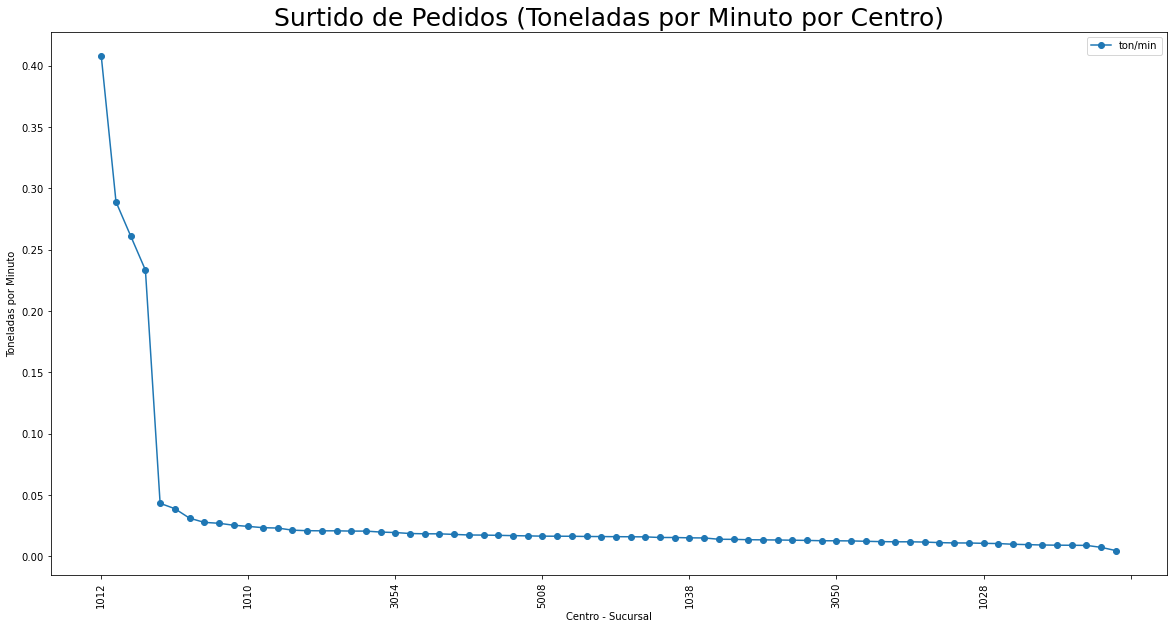

In [48]:
# Se grafican por toneladas por minuto primedio por centro (almacen)
df_pivot_por_centro.plot(x='Ce.', y='ton/min', marker = 'o', figsize=(20,10))
plt.xticks(rotation='vertical')
plt.title('Surtido de Pedidos (Toneladas por Minuto por Centro)', fontsize=25)
plt.xlabel('Centro - Sucursal')
plt.ylabel('Toneladas por Minuto')
plt.style.use('fast')
plt.show()


### Conclusiones:
* El 94% de las sucursales tienen tiempos estandarizados de armado de pedido, con esto se comprueba la hipotesis de que la implementación de los desarrollos de automatización de armado y acomodo de producto implementados en el ultimo semestre estan siendo funcionales, ayudando a estandarizar el tiempo de armado de pedidos.
* Hay 4 almaenes que tienen un prmedio de toneladas por minuto hasta 10 veces mayor que el resto de los almacenes, se sugiere identificar las causas para determinar si los motivos son replicables o son tropicalizados con situaciones especiales de dichos almacenes.

Text(0, 0.5, 'Cantidad de Centros por bracket')

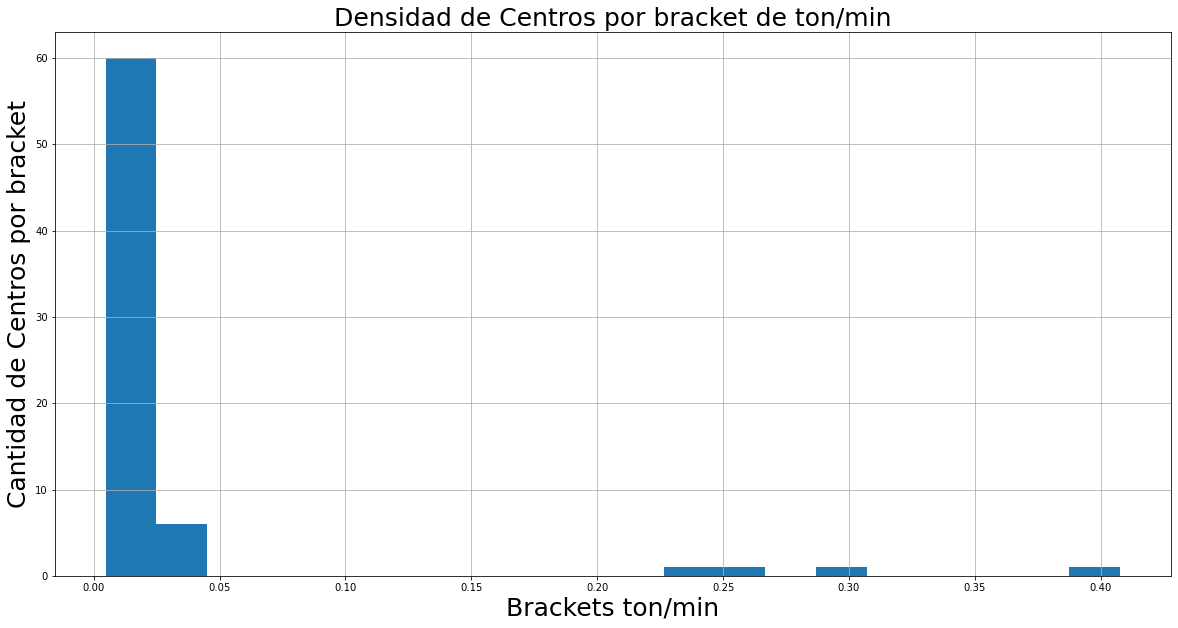

In [49]:
# Representacion de densidad de brackets de ton/min
df_pivot_por_centro['ton/min'].hist(bins=20, figsize=(20,10))
plt.style.use('bmh')
plt.title('Densidad de Centros por bracket de ton/min', fontsize=25)
plt.xlabel('Brackets ton/min', fontsize=25)
plt.ylabel('Cantidad de Centros por bracket', fontsize=25)


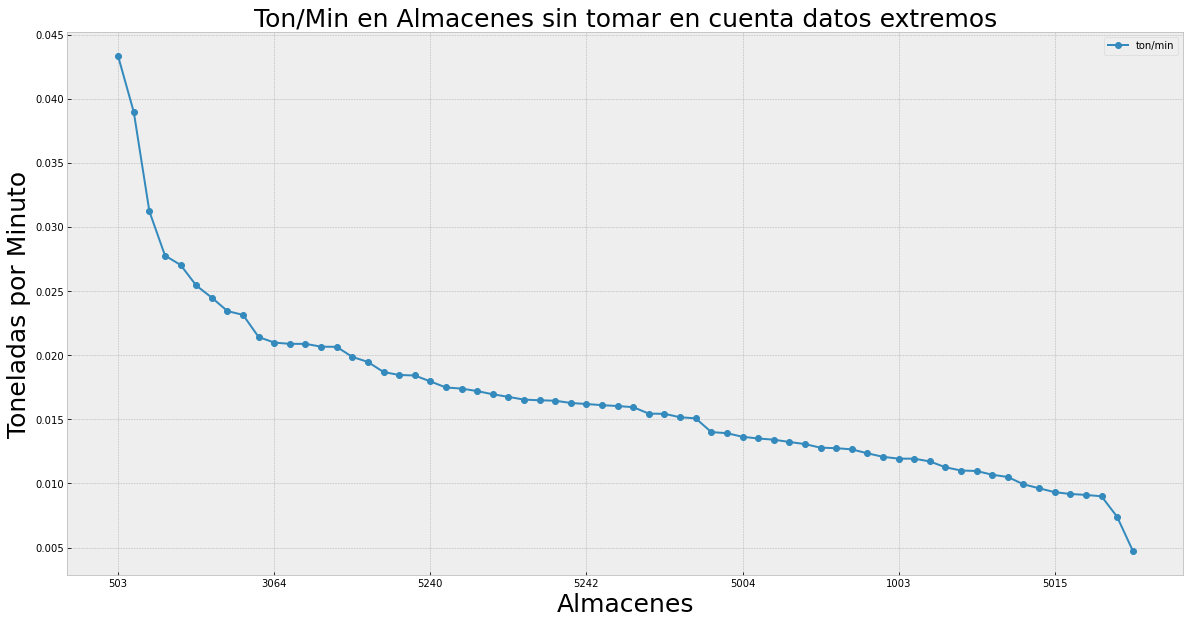

In [50]:
# Comportamiento de los centros dentro del bracket con mayor densidad
df_pivot_por_centro[df_pivot_por_centro['ton/min']<0.05][['Ce.','ton/min']].plot(x='Ce.', 
                                                                                 y='ton/min', 
                                                                                 marker = 'o',
                                                                                 figsize=(20,10))
plt.title('Ton/Min en Almacenes sin tomar en cuenta datos extremos', fontsize=25)
plt.xlabel('Almacenes', fontsize=25)
plt.ylabel('Toneladas por Minuto', fontsize=25)

plt.style.use('bmh')


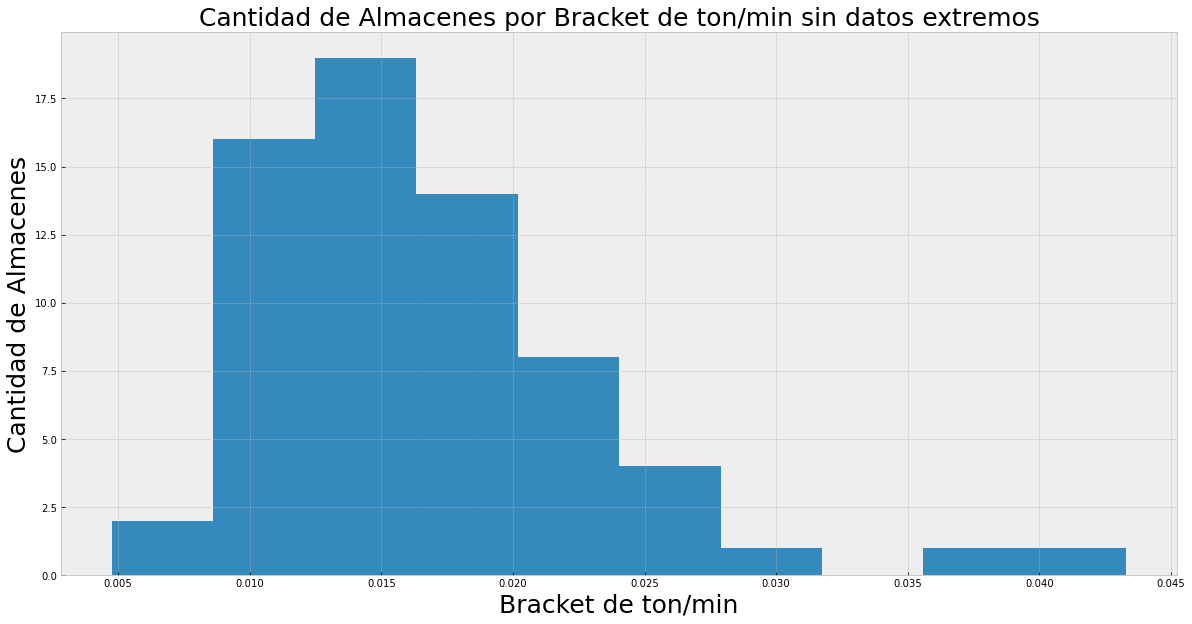

In [51]:
# Densidad de brackets de ton/min con el 96% df los datos entre 0.01 y 0.04
df_pivot_por_centro[df_pivot_por_centro['ton/min']<0.05][['Ce.','ton/min']].hist(figsize=(20,10))
plt.title('Cantidad de Almacenes por Bracket de ton/min sin datos extremos', fontsize=25)
plt.xlabel('Bracket de ton/min', fontsize=25)
plt.ylabel('Cantidad de Almacenes', fontsize=25)
plt.style.use('bmh')

### Investigacion de Outlier mas lejano

In [52]:
# El centro 1012 realizó registros en celular el 1 de Agosto
print('Son: ',len(df_final_pivot[df_final_pivot['Ce.']==1012]['Entrega'].unique()), 'Entregas')
df_final_pivot[df_final_pivot['Ce.']==1012]['Entrega'].unique()

Son:  31 Entregas


array(['3461843813', '3462030940', '3462030941', '3462145911',
       '3462150281', '3462150282', '3462150283', '3462150284',
       '3462159820', '3462159821', '3462162932', '3462162933',
       '3462164624', '3462164625', '3462165344', '3462165345',
       '3462165346', '3462165347', '3462165348', '3462165349',
       '3462165350', '3462174484', '3462174485', '3462176285',
       '3462176286', '3462178478', '3462179469', '3462179470',
       '3462179471', '3462179472', '3462179473'], dtype=object)

In [53]:
# Muestra de Clientes de las entregas del Centro 1012
list(df_final[df_final['Ce.']==1012]['Comentario'].unique())

['DELIREGIO ALIMENTOS, S.A.',
 'HB  ALIMENTOS SA DE CV',
 'HB ALIMENTOS, S.A. DE C.V.',
 'DELIREGIO ALIMENTOS S A',
 'DELIREGIO A. REYES',
 'SUPER CENTRO COMERCIAL ROMA, S.A. D',
 'QUESOS Y CARNES FRIAS DELNORTE, S.',
 'QUESOS Y CARNES FRIAS DELNORTE, S.A',
 'KESOS Y KOSAS SUC ESCOBEDO',
 'HERIBERTO ORDONEZ RIOS',
 'QUESOS Y CARNES FRIAS DEL NORTE, S.',
 'MAS BODEGA Y LOGISTICA SA DE CV',
 'REGIO ABARROTES SA DE CV',
 'GF EXPRESS AUTOSERVICIOS, S.A. DE C',
 'SALCHICHONERIA GRANDY S.A DE C.V',
 'GUSTAVO ALIMENTOS, S.A. DE C.V.',
 'LACTEOS Y CARNES LOPEZ  SA',
 'LACTEOS Y CARNES LOPEZ, S.A.',
 'COMERCIAL TREVIÑO SA DE CV',
 'GUSTAVO ALIMENTOS SA DE CV']

### Comentarios:
1. Invesigtando el Almacen con mas alto indicador de ton/min de armado de pedidos, se encontro que unicamente surten pedidos con tarima completa, por lo que el por cada movimiento que hacen pueden surtir hasta 800 kilos en 2-3 minutos de tiempo (movimiento de montacargas de almacen a camioneta), y el tiempo de registro del surtido en el sistema es de 5 segundos por el mismo almacenista, cuando antes era de 5 minutos y por un colaborador diferente (Analista)).
2. Se concluye que este tipo de almacenes deben estar agrupados separadamente para no ocasionar outliers en los analisis.

# Siguientes Pasos:
1. Utilizar este metodo de analisis para determinar:
    a) Productividad por almacenista ( Tiempos y Toneladas )
    b) Productividad por familia de productos
    c) Productividad por Producto
    
2. Analizar que datos hacen falta para correlacionar esta información y construir un modelo predictivo para crear una referencia de tiempo de surtido de pedidos y mejorar los tiempos actuales. (tipo de cliente, tipo de almacen, tamaño de pedidos, grupo de clientes, tipo de producto(paqueteria-granel, etc)

# Anexos

In [54]:
# Estilos de grficas
styles = plt.style.available
styles

['Solarize_Light2',
 '_classic_test_patch',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn',
 'seaborn-bright',
 'seaborn-colorblind',
 'seaborn-dark',
 'seaborn-dark-palette',
 'seaborn-darkgrid',
 'seaborn-deep',
 'seaborn-muted',
 'seaborn-notebook',
 'seaborn-paper',
 'seaborn-pastel',
 'seaborn-poster',
 'seaborn-talk',
 'seaborn-ticks',
 'seaborn-white',
 'seaborn-whitegrid',
 'tableau-colorblind10']

In [55]:
# funcion crea mostrar todos los estilos de graficas
def plot_style(style):
    print('Usando estilo: ', style)
    df_pivot_por_centro.plot(x='Ce.', y='ton/min', figsize=(10,5))
    plt.xticks(rotation='vertical')
    plt.title('Surtido de Pedidos (Toneladas por Minuto por Centro)')
    plt.xlabel('Centro - Sucursal')
    plt.ylabel('Toneladas por Minuto')
    plt.style.use(style)
    plt.show()

Usando estilo:  Solarize_Light2


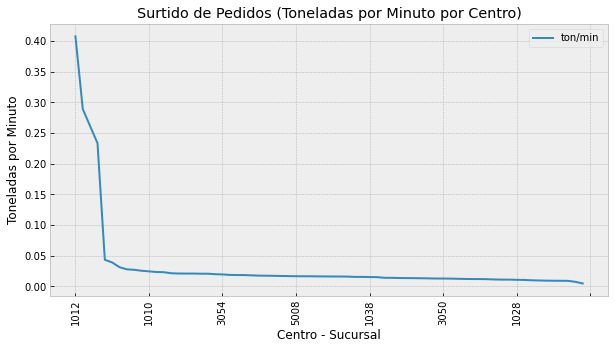

Usando estilo:  _classic_test_patch


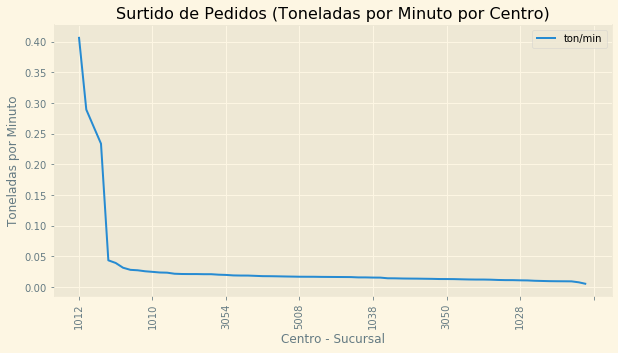

Usando estilo:  bmh


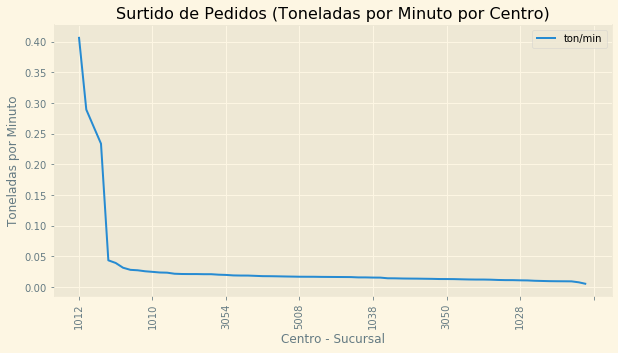

Usando estilo:  classic


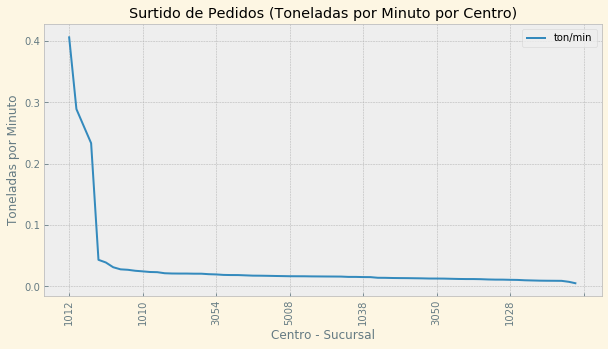

Usando estilo:  dark_background


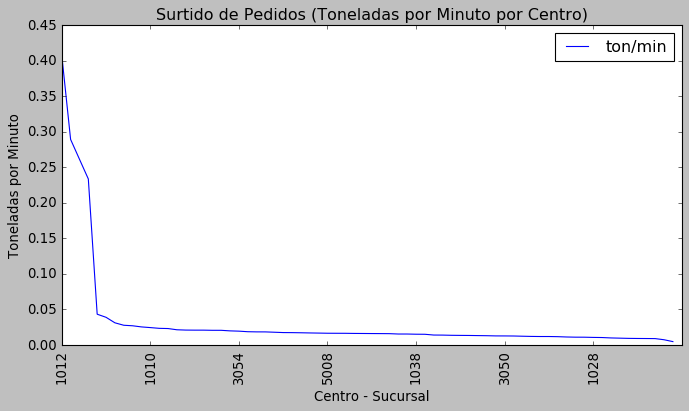

Usando estilo:  fast


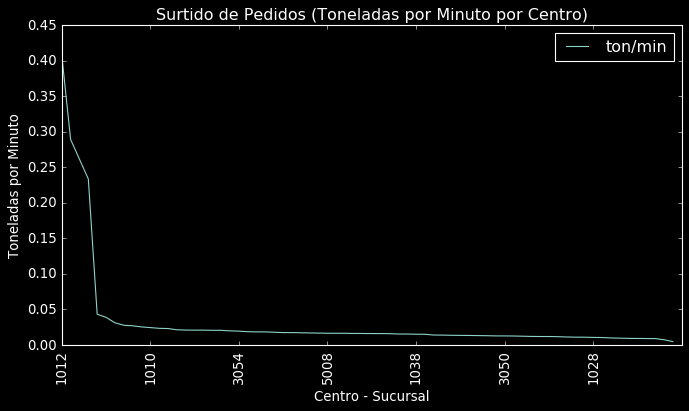

Usando estilo:  fivethirtyeight


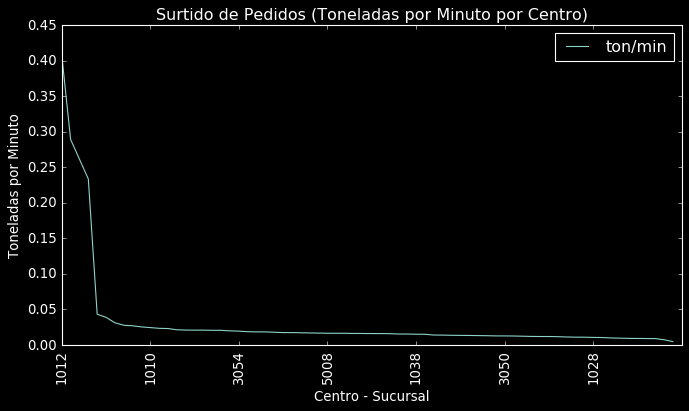

Usando estilo:  ggplot


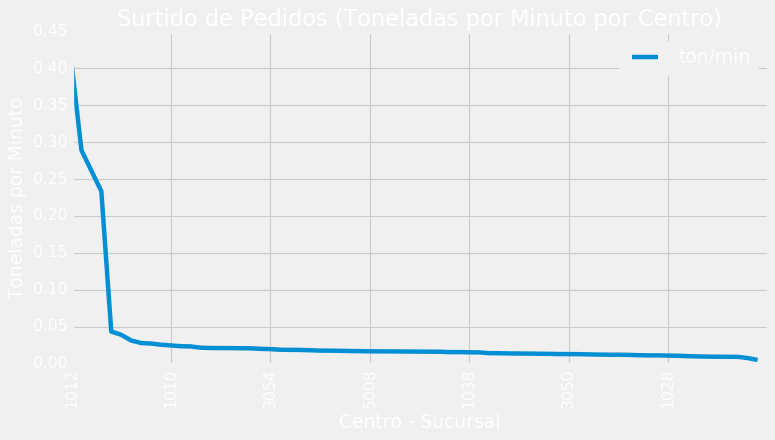

Usando estilo:  grayscale


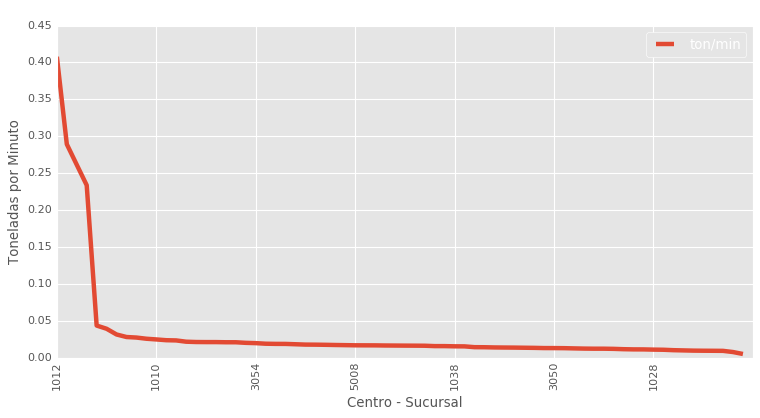

Usando estilo:  seaborn


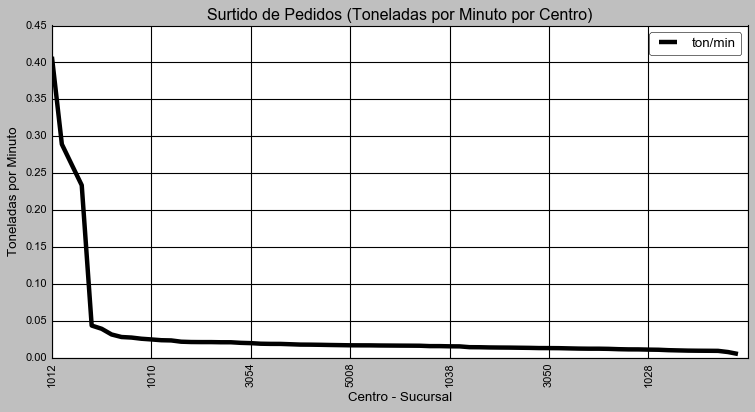

Usando estilo:  seaborn-bright


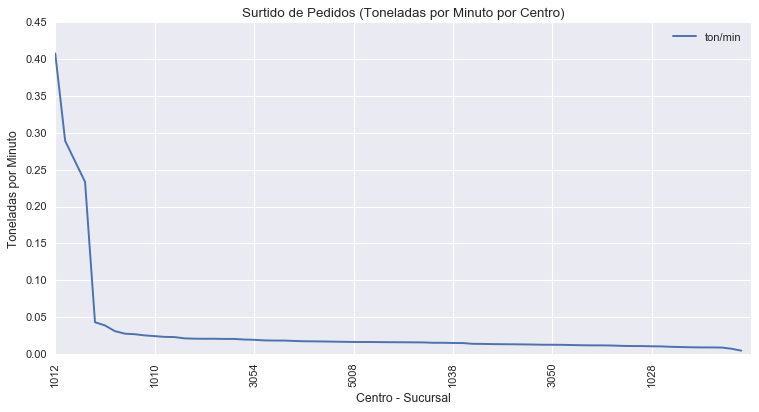

Usando estilo:  seaborn-colorblind


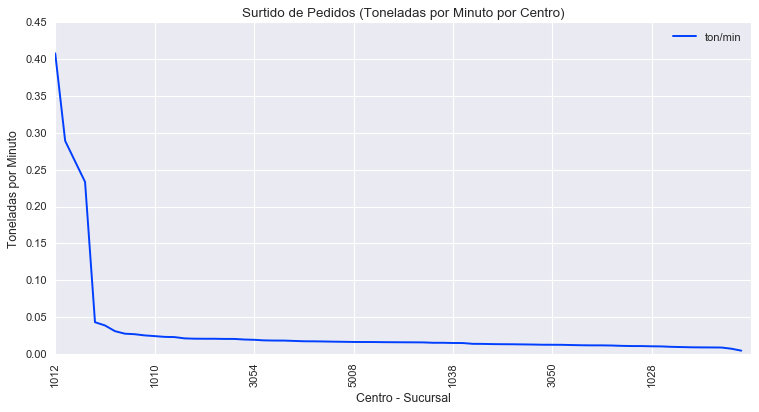

Usando estilo:  seaborn-dark


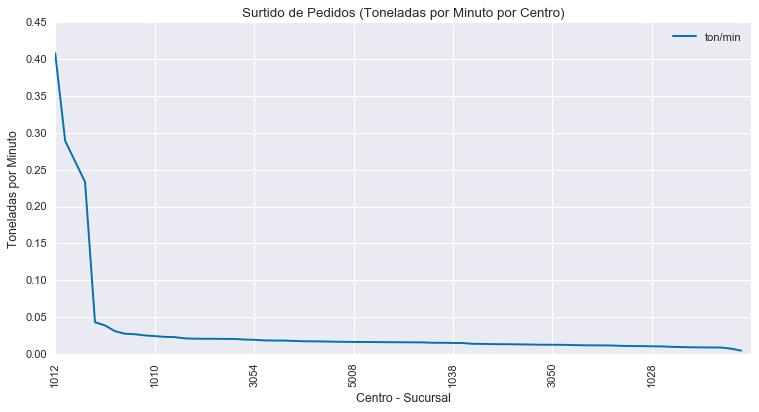

Usando estilo:  seaborn-dark-palette


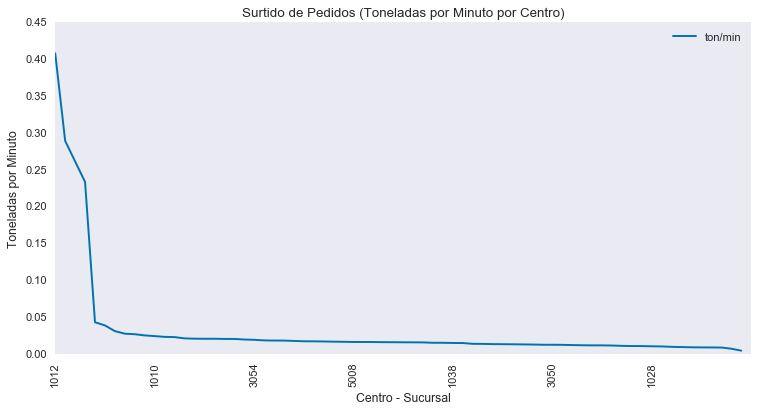

Usando estilo:  seaborn-darkgrid


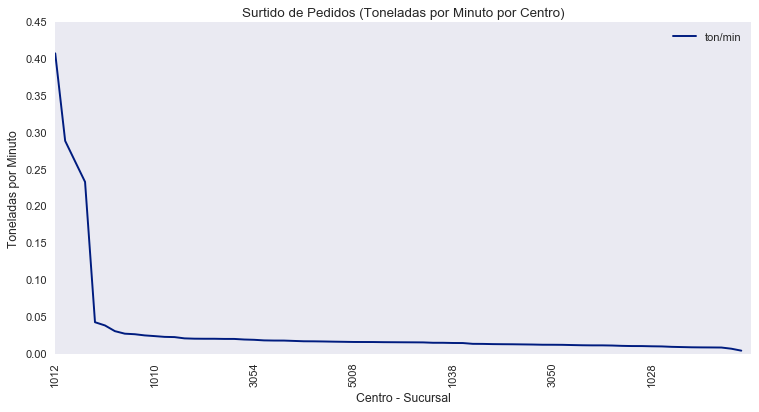

Usando estilo:  seaborn-deep


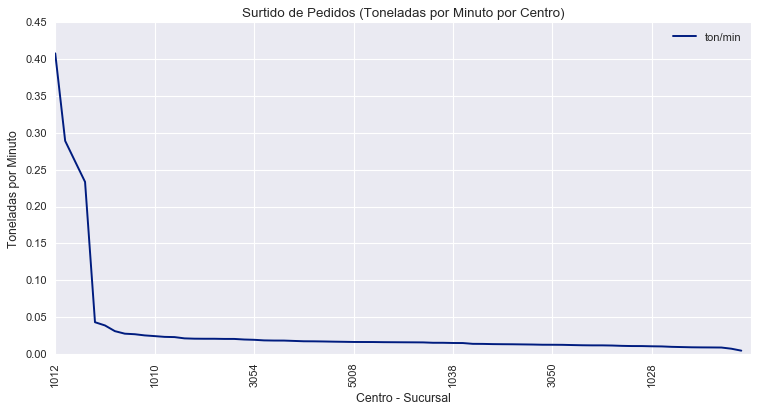

Usando estilo:  seaborn-muted


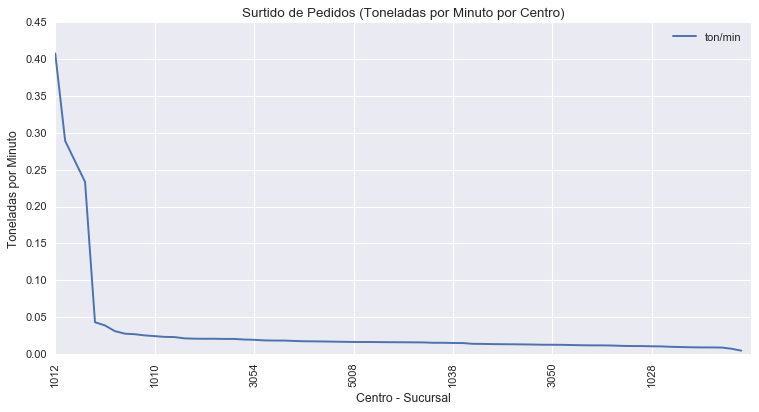

Usando estilo:  seaborn-notebook


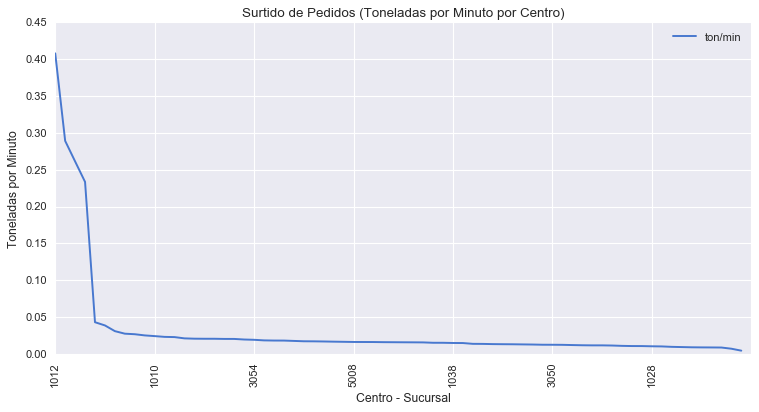

Usando estilo:  seaborn-paper


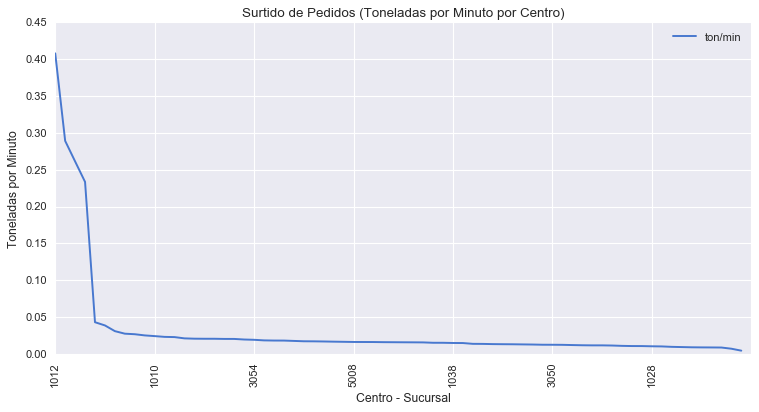

Usando estilo:  seaborn-pastel


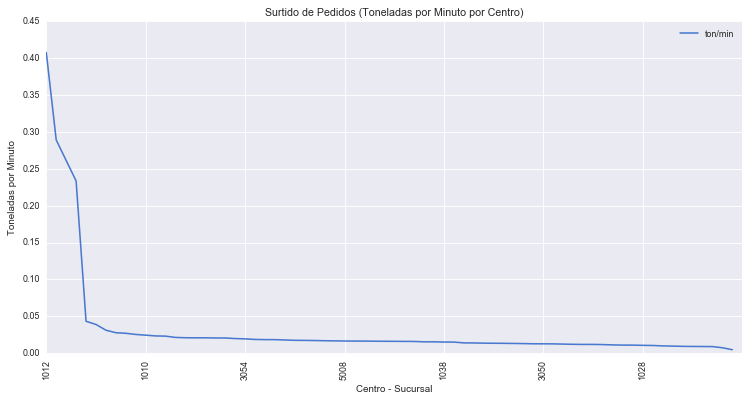

Usando estilo:  seaborn-poster


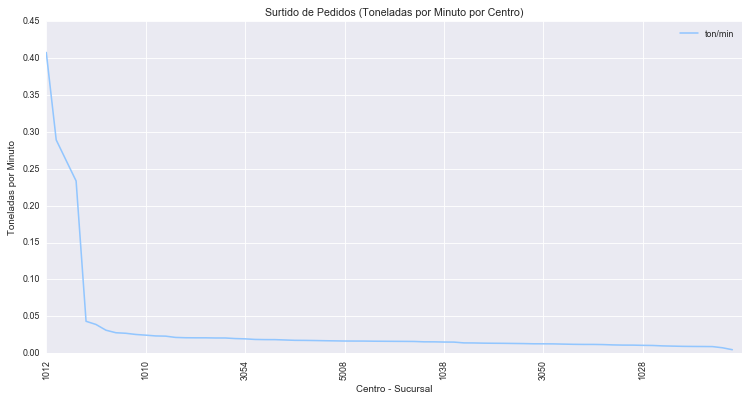

Usando estilo:  seaborn-talk


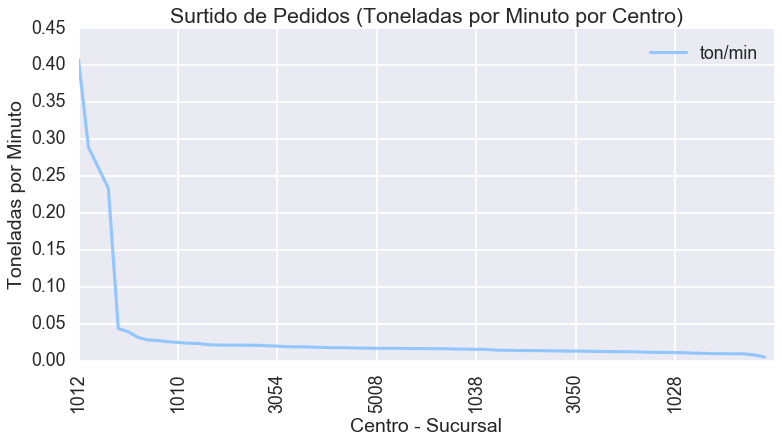

Usando estilo:  seaborn-ticks


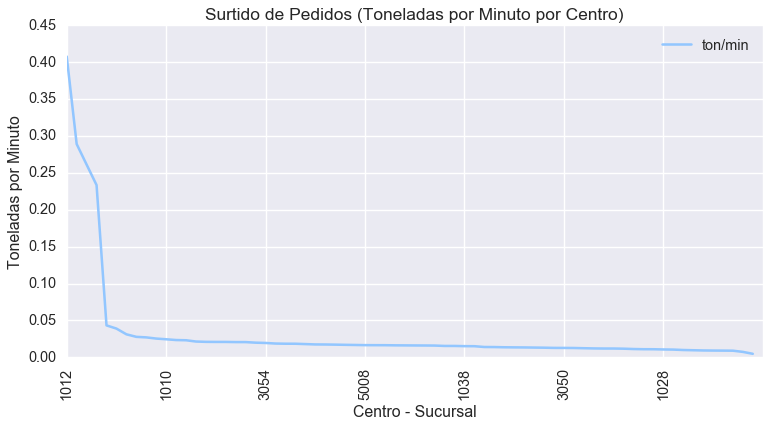

Usando estilo:  seaborn-white


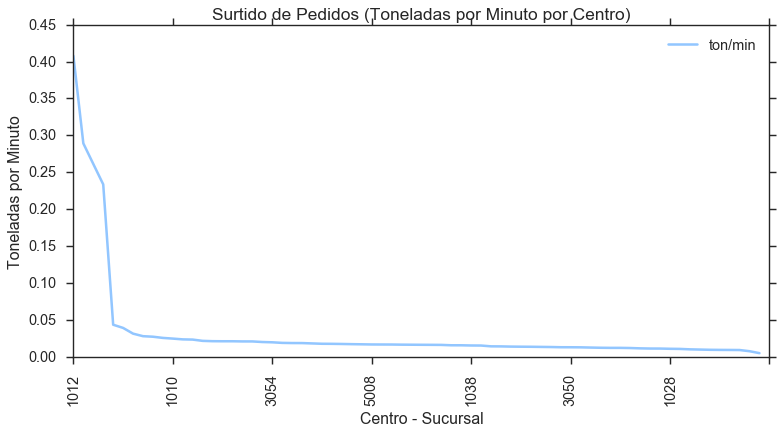

Usando estilo:  seaborn-whitegrid


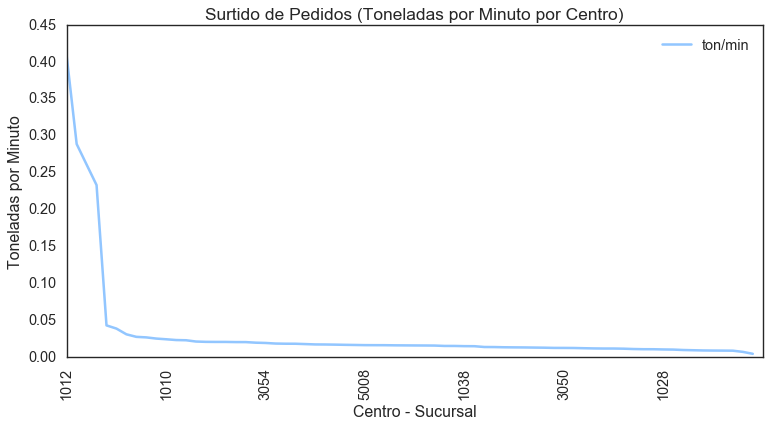

Usando estilo:  tableau-colorblind10


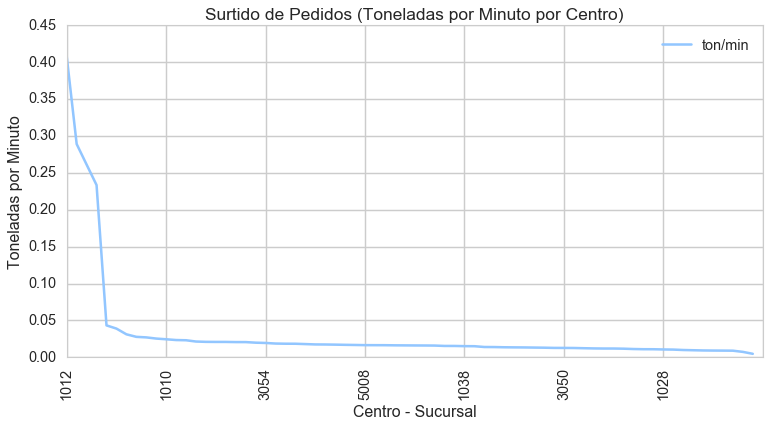

In [56]:
# Se muestran todos los estilos de grafica disponibles
for style in styles:
    plot_style(style)
    

# Kilos por almacenista por sucursal

In [57]:
# Se prepara la pivote
df_pivot_por_almacenista = pd.pivot_table(df_final_pivot,
                                          index = ['Ce.', 'Nº pers.'],
                                          values =  ['Peso bruto'],
                                          aggfunc= ['sum']
                                         )
#df_pivot_por_almacenista.reset_index(inplace=True)
df_pivot_por_almacenista['sum'] = df_pivot_por_almacenista['sum']/1000
df_pivot_por_almacenista.head()

sum
             Peso bruto
Ce. Nº pers.           
503 225338     2.896700
    243980     2.395513
    273483     3.270992
    279461     2.944378
504 171172     0.533149

In [58]:
# Se extrae un centro como indice para comprobar que los datos son viables para grafica
df_pivot_por_almacenista.loc[503]

,sum
,Peso bruto
Nº pers.,
225338,2.896700
243980,2.395513
273483,3.270992
279461,2.944378


<AxesSubplot:xlabel='Nº pers.'>

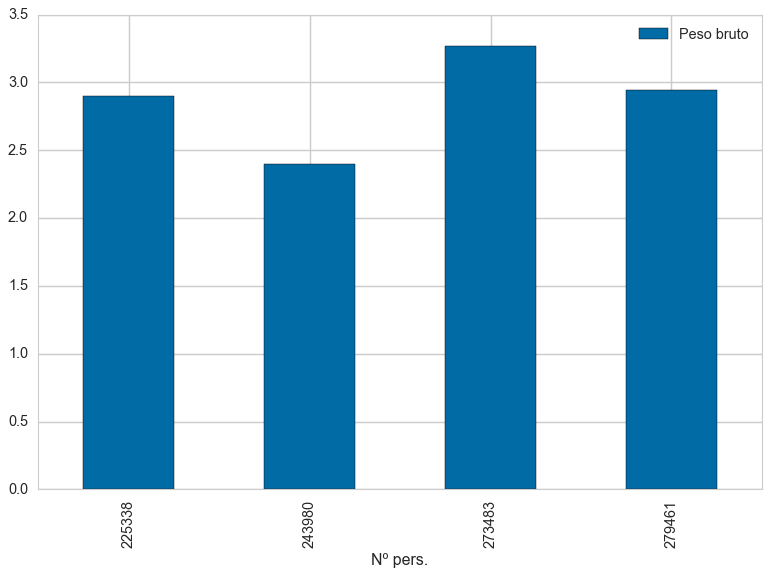

In [59]:
# Se grafican los datos de un centro
df_pivot_por_almacenista['sum'].loc[503].plot.bar()

In [60]:
# Se consultan los indices multiples para extraer solo el centro para usarlo como iterable y graficarlos individualmente
centros_alm = df_pivot_por_almacenista.index.to_list()
# Se muestran los primero 10 registros del array para visualizar el tipo de datoa
centros_alm[:10]
# Conclusion; Es una lista de tuplas donde los centros se repiten

[(503, 225338),
 (503, 243980),
 (503, 273483),
 (503, 279461),
 (504, 171172),
 (504, 256396),
 (505, 162580),
 (505, 193832),
 (505, 232146),
 (506, 232881)]

In [61]:
# Se construye la lista de centros para iterar y graficar sus almacenistas
lista_centros_alm = []

# Se itera sobre la lista de los indices de centros
for tupla in range(len(centros_alm)):
    # Se extrae el centro de la tupla
    item = centros_alm[tupla][0]
    # Se evita que se el centro se inserte duplicado a la lista
    if item in lista_centros_alm:
        continue
    else:
        # Si no está duplicado se inserta en la listra
        lista_centros_alm.append(item)

# Se muestra la lista de centros
lista_centros_alm

[503,
 504,
 505,
 506,
 1003,
 1006,
 1010,
 1012,
 1020,
 1026,
 1028,
 1030,
 1032,
 1034,
 1036,
 1038,
 1040,
 1042,
 1050,
 1060,
 1062,
 3002,
 3006,
 3008,
 3010,
 3020,
 3022,
 3030,
 3040,
 3042,
 3044,
 3050,
 3052,
 3054,
 3060,
 3062,
 3064,
 3070,
 3072,
 3074,
 3082,
 3084,
 5004,
 5006,
 5008,
 5009,
 5015,
 5016,
 5018,
 5020,
 5034,
 5130,
 5140,
 5150,
 5160,
 5170,
 5180,
 5230,
 5240,
 5242,
 5250,
 5252,
 5254,
 5256,
 5262,
 5270,
 5272,
 5280,
 5282,
 5292]

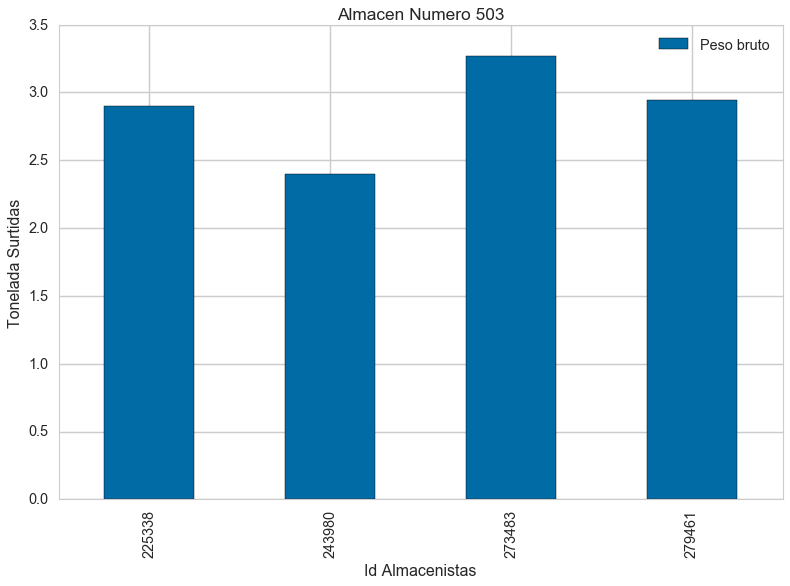

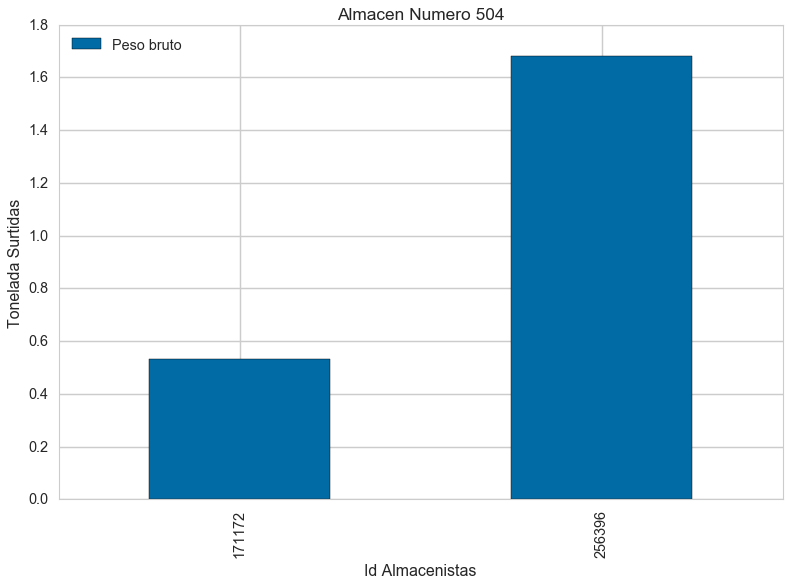

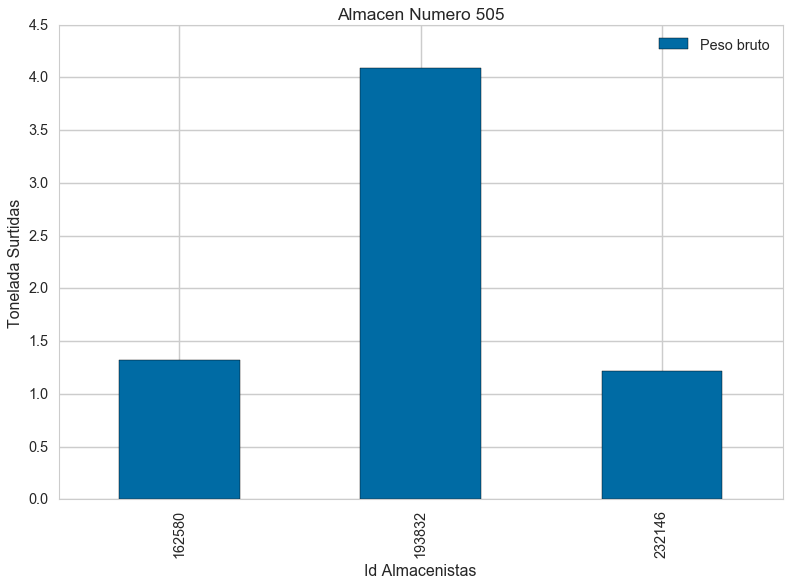

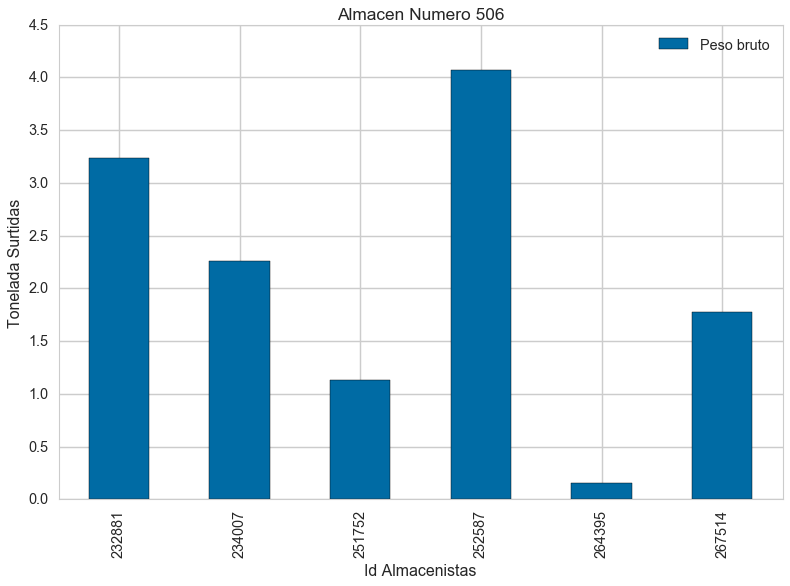

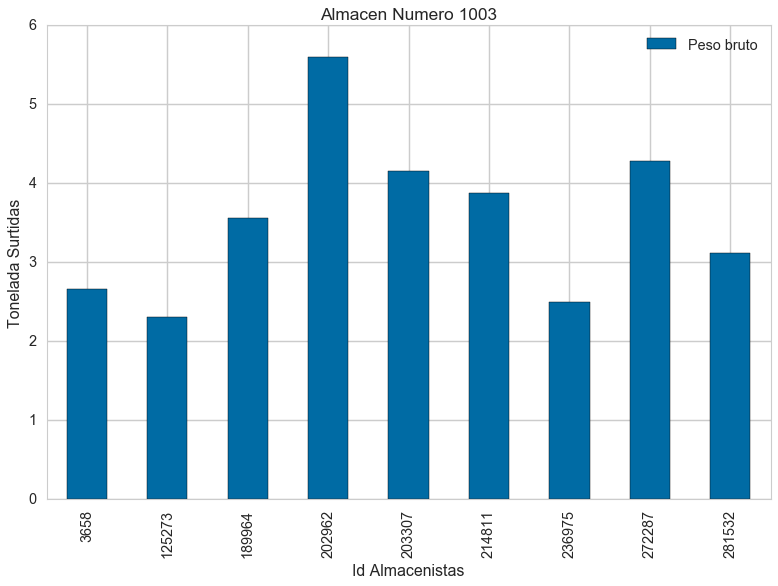

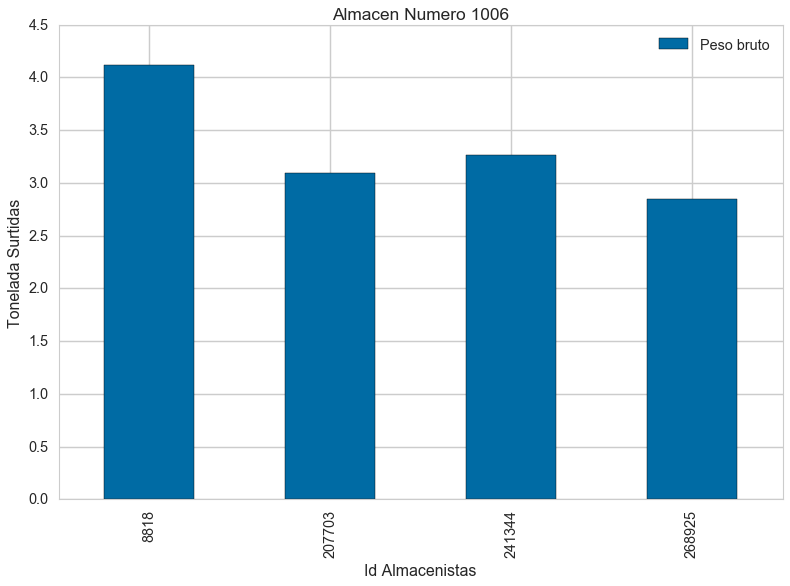

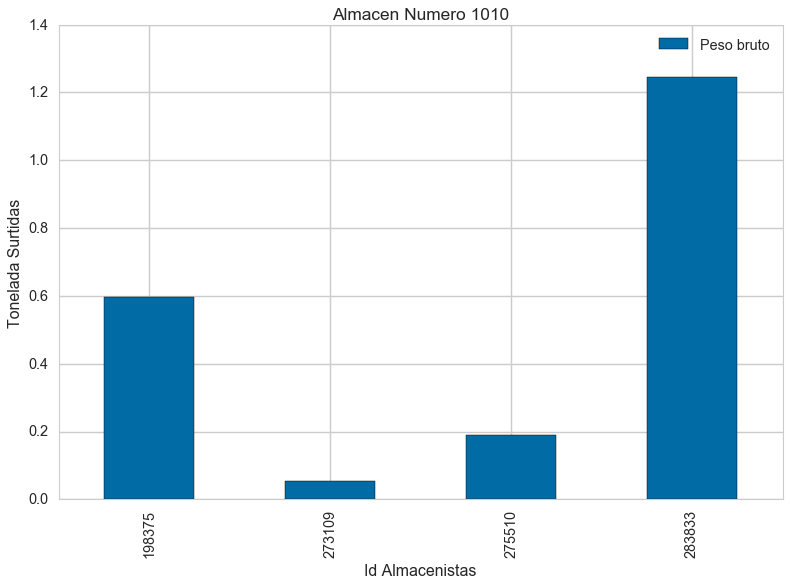

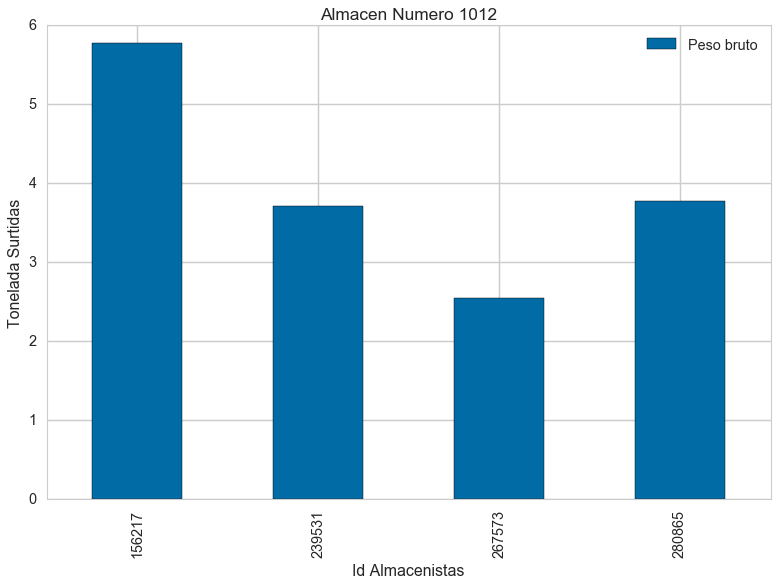

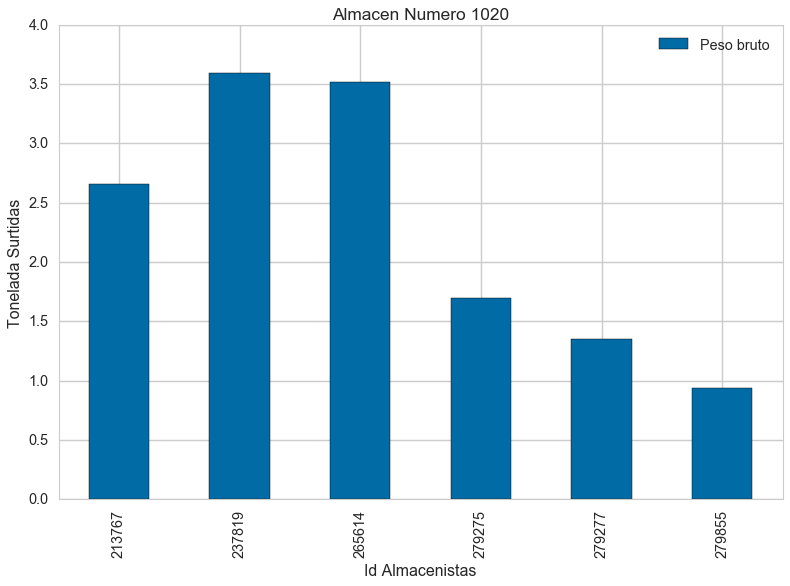

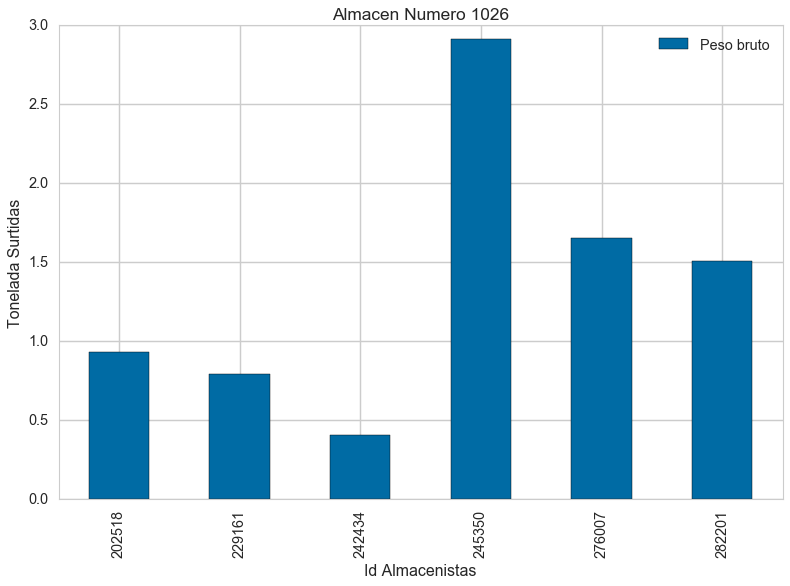

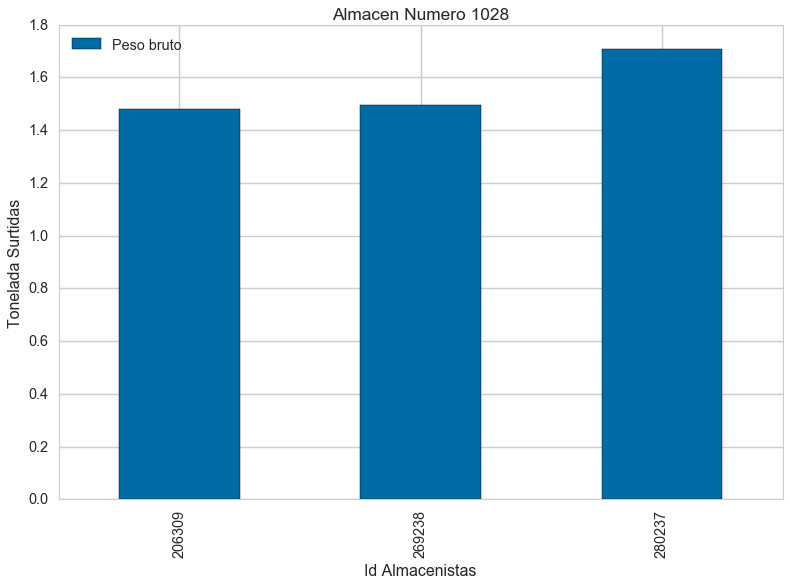

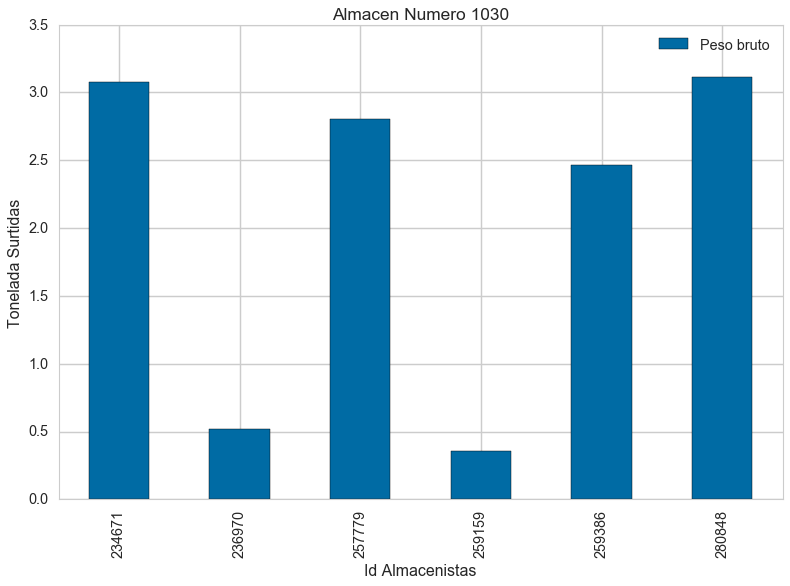

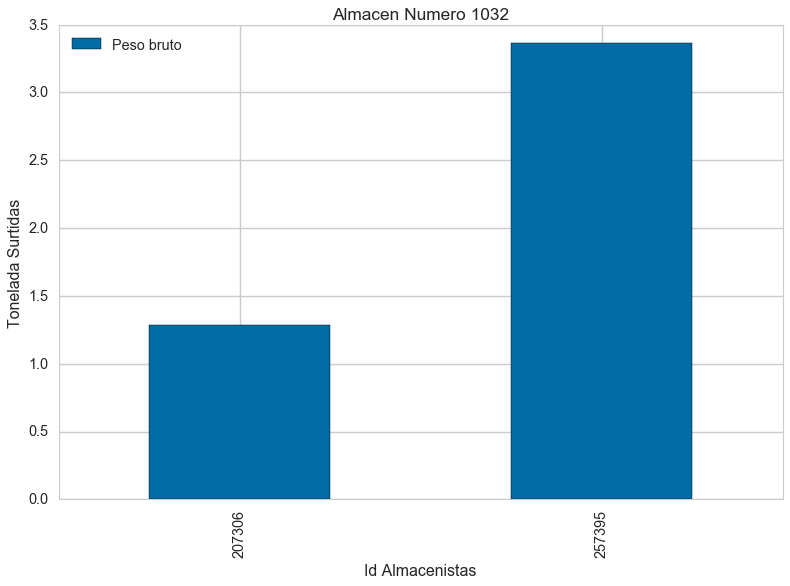

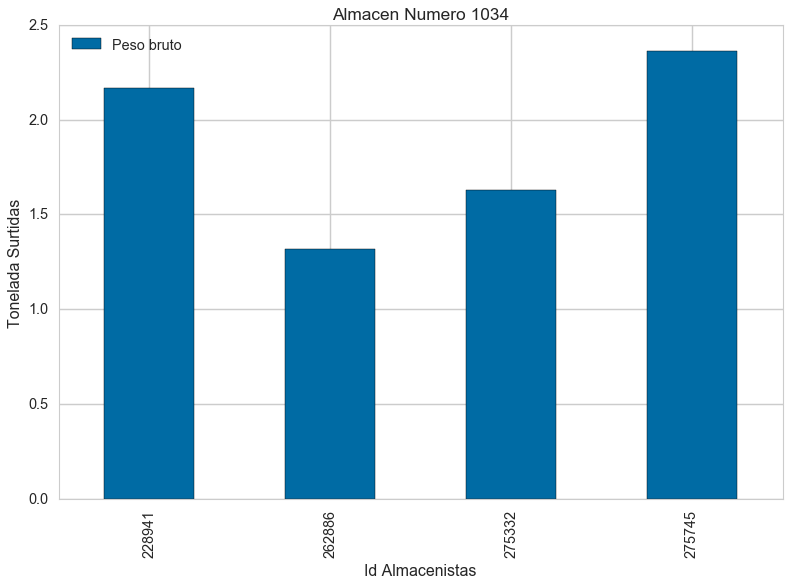

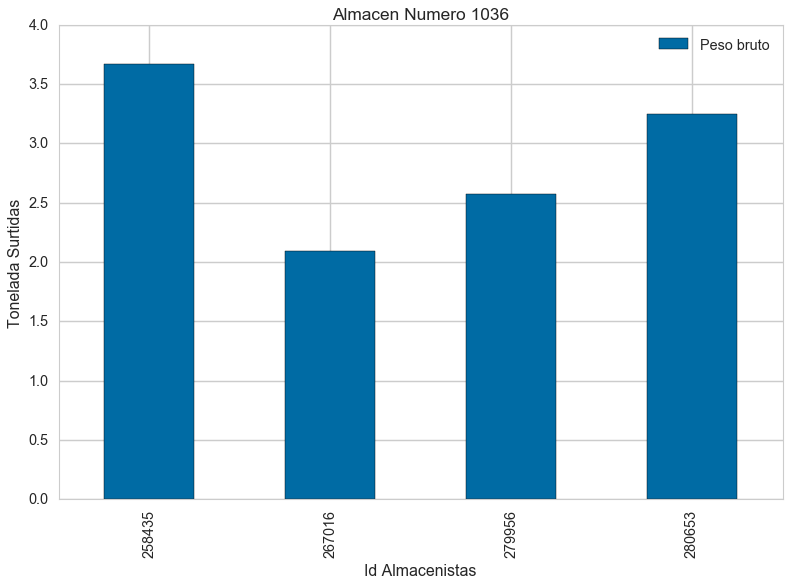

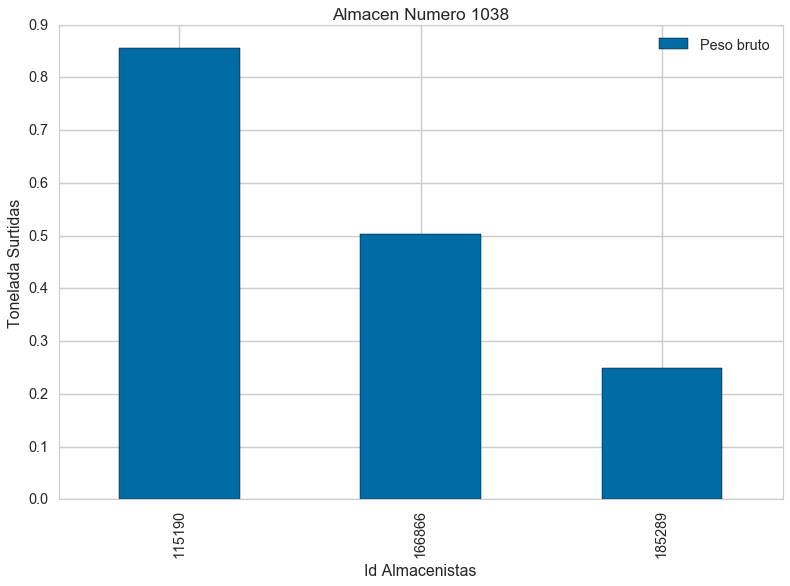

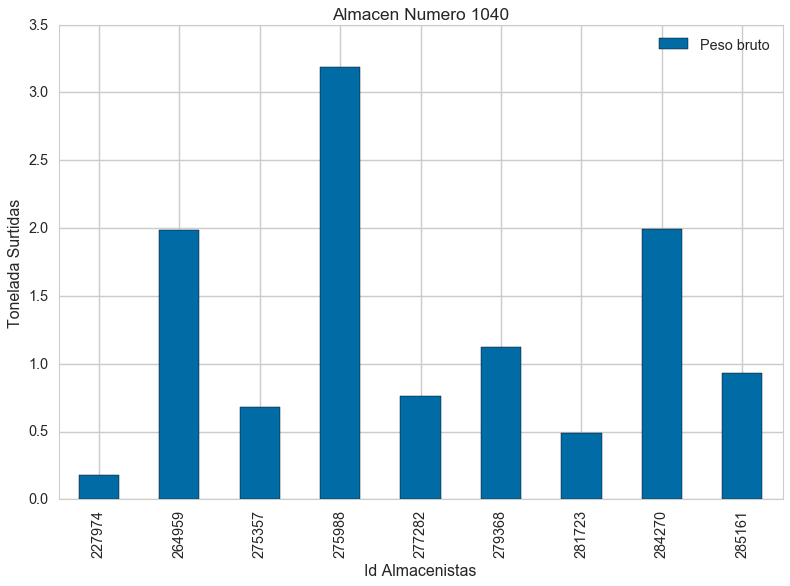

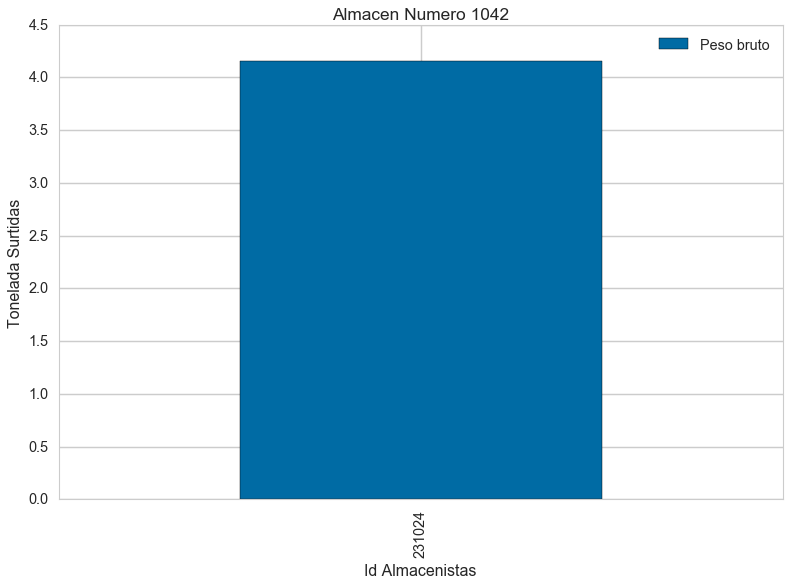

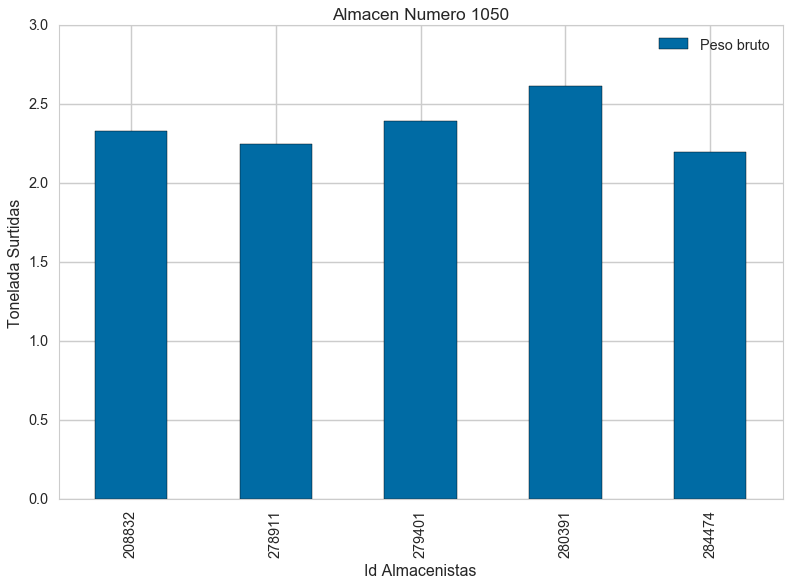

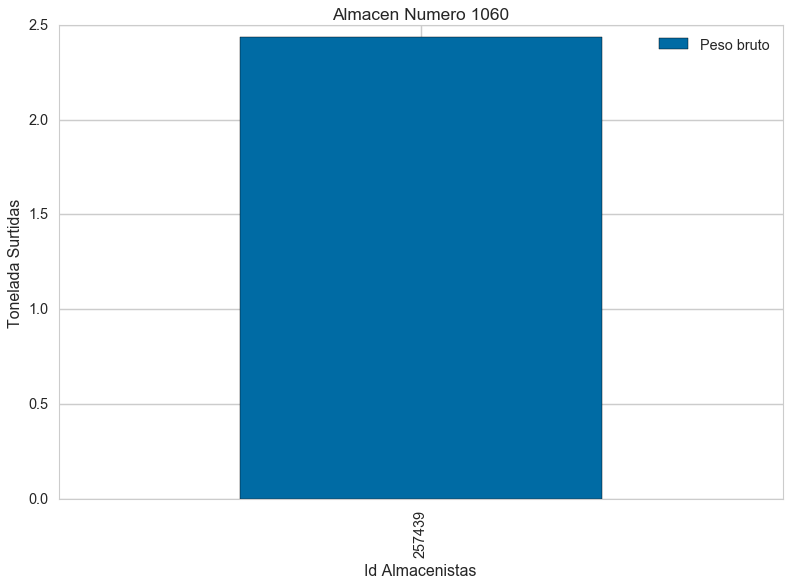

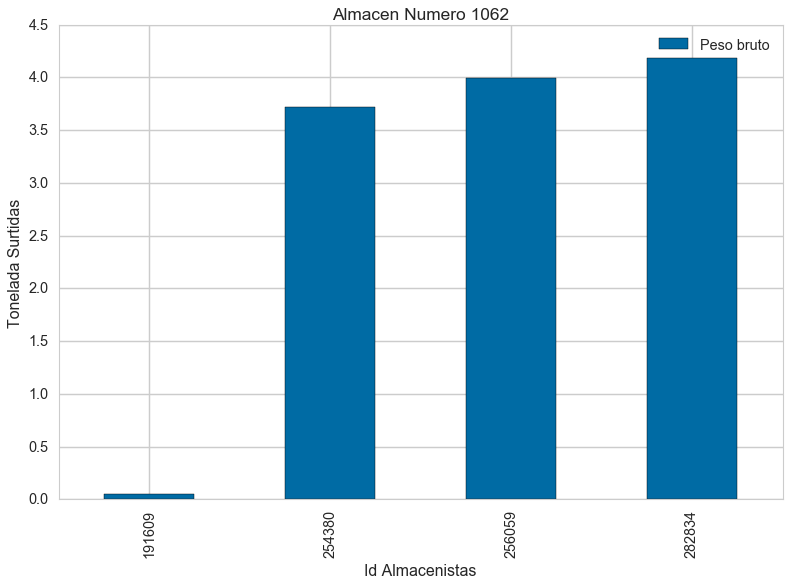

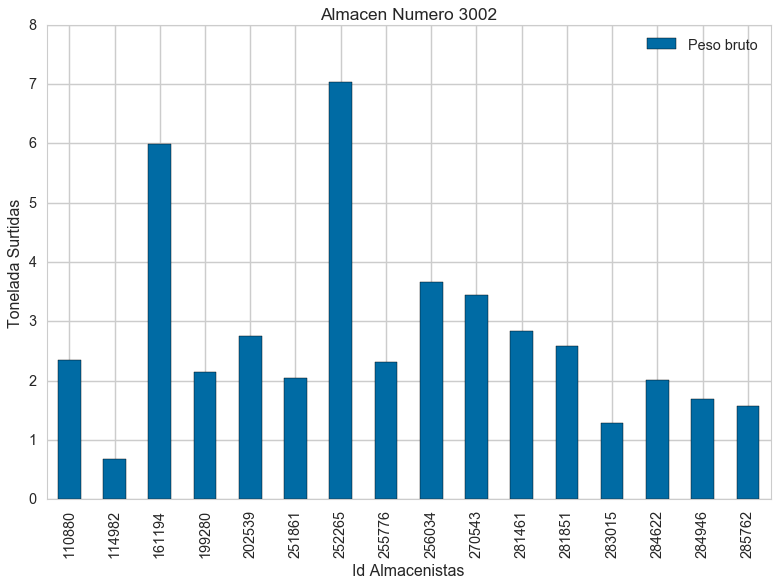

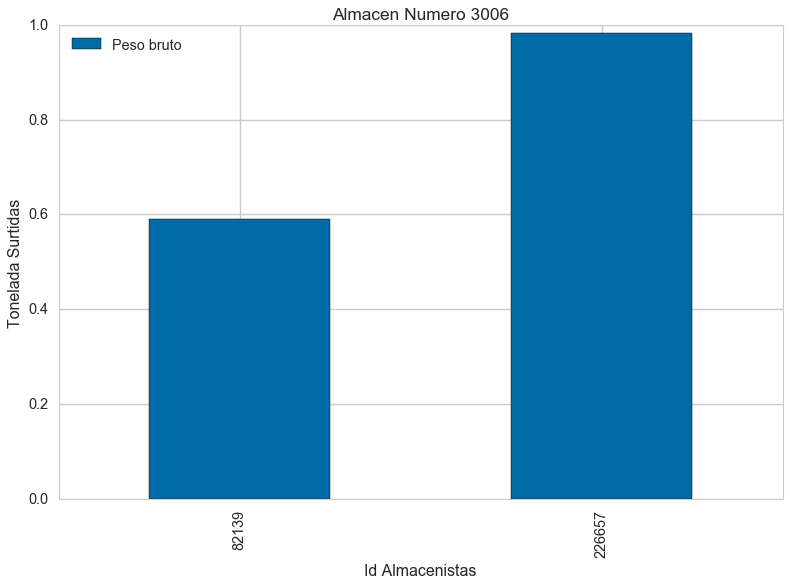

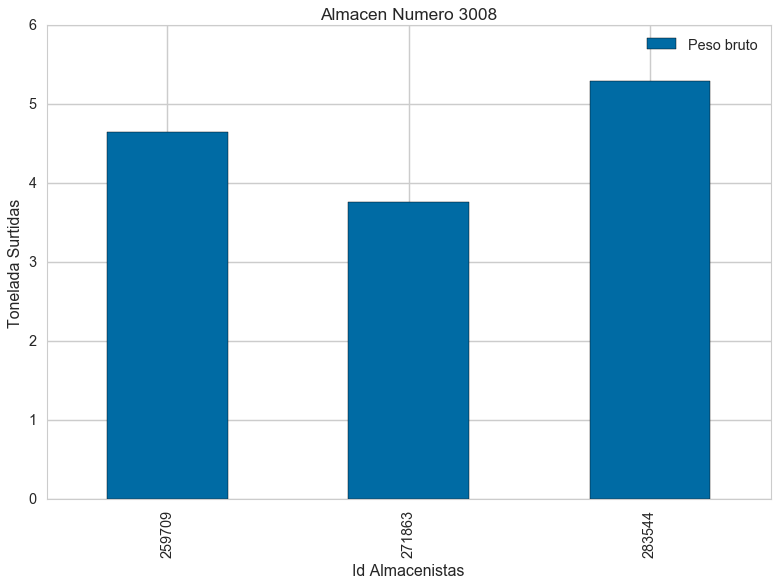

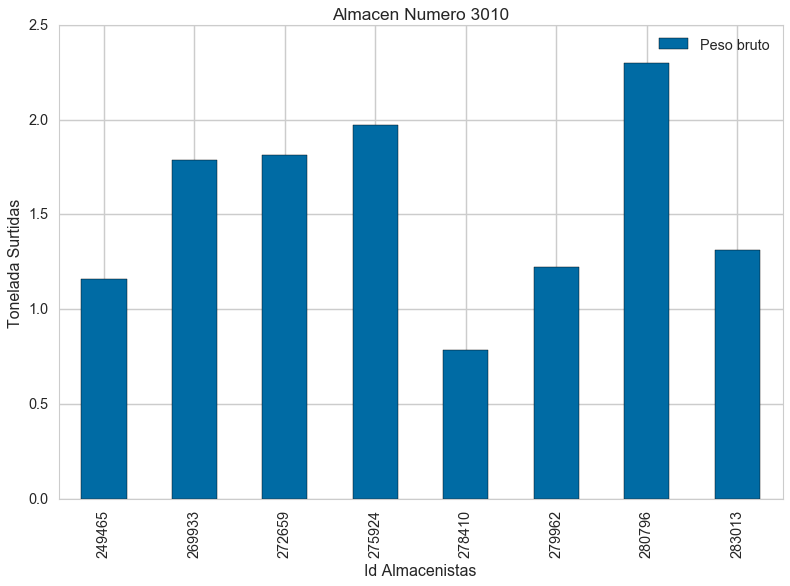

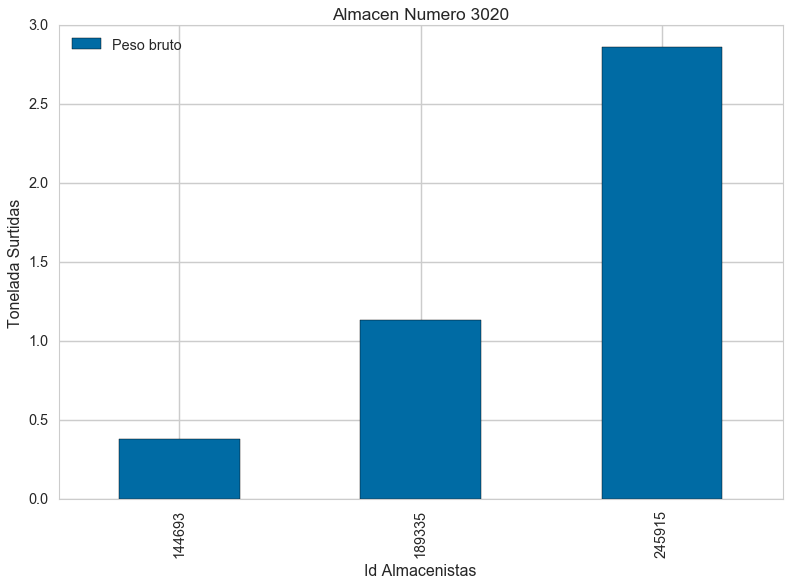

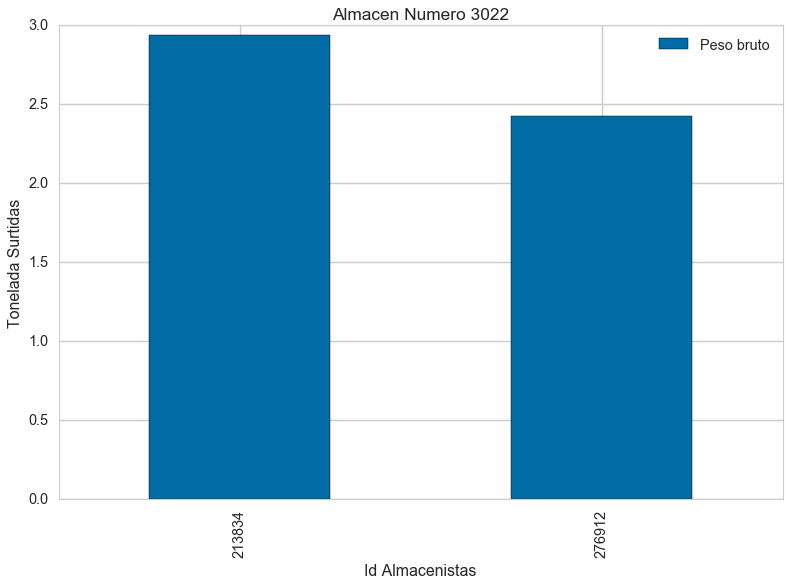

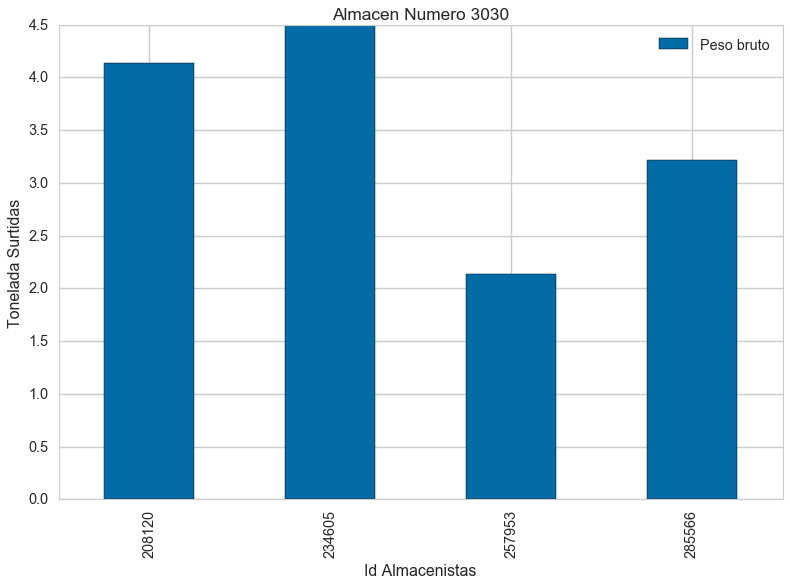

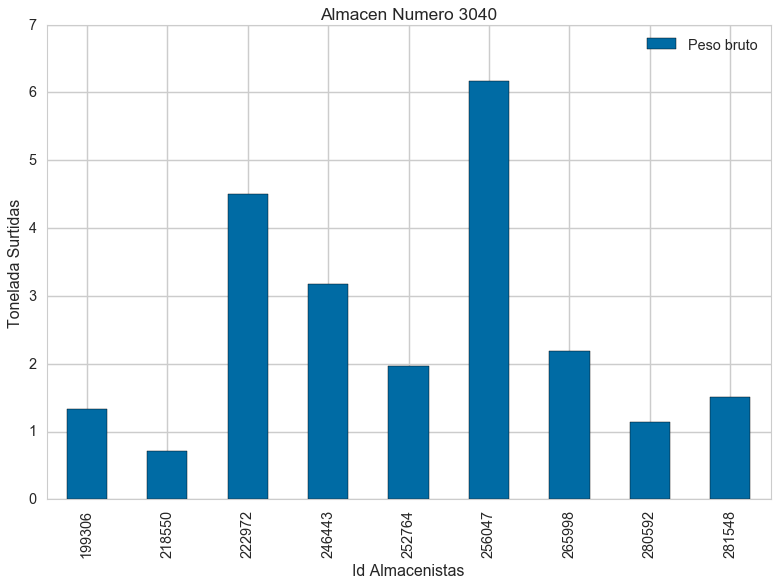

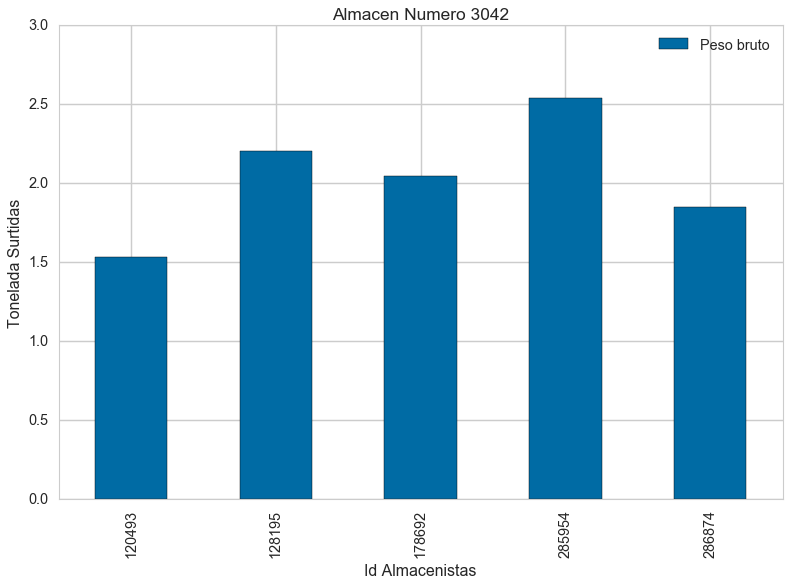

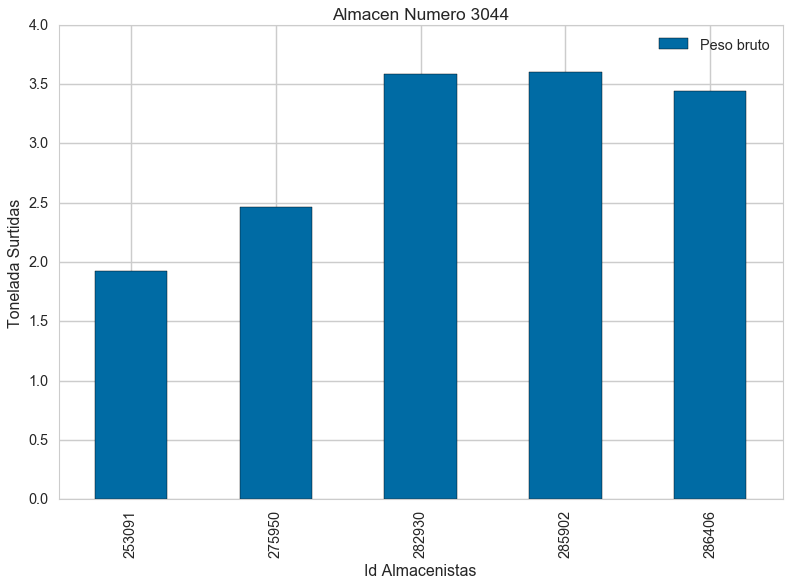

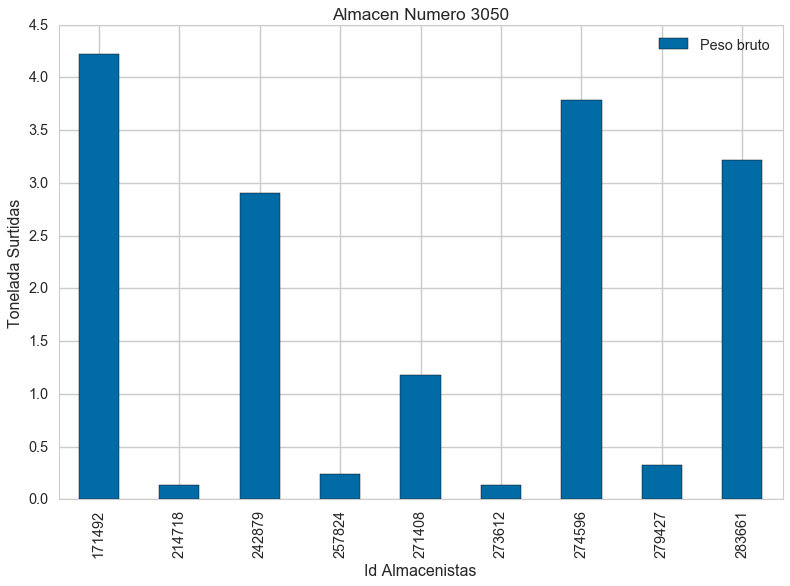

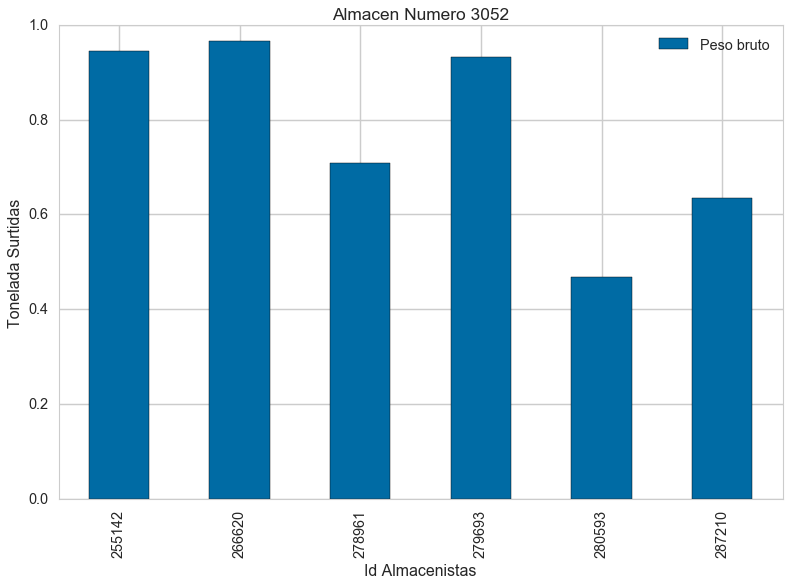

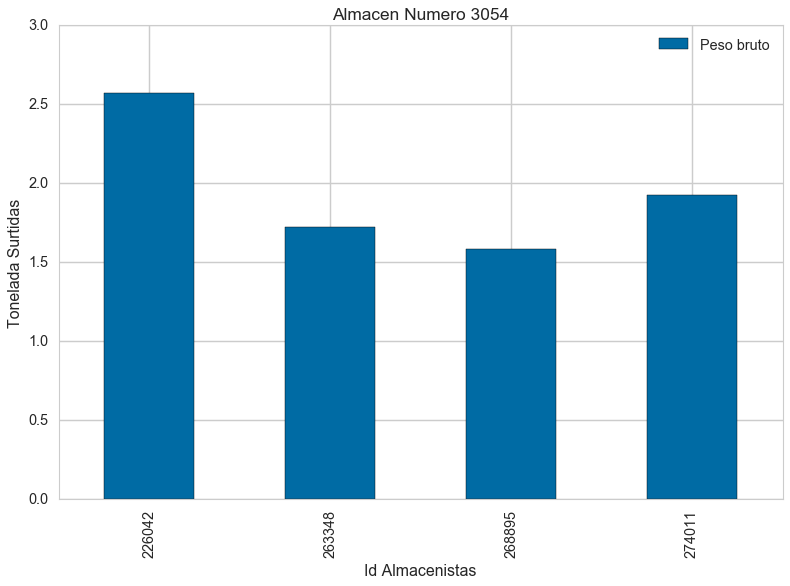

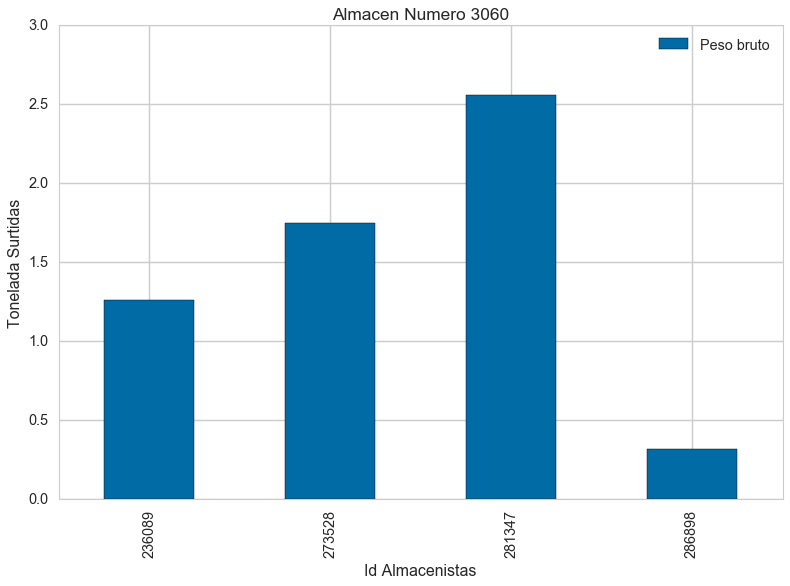

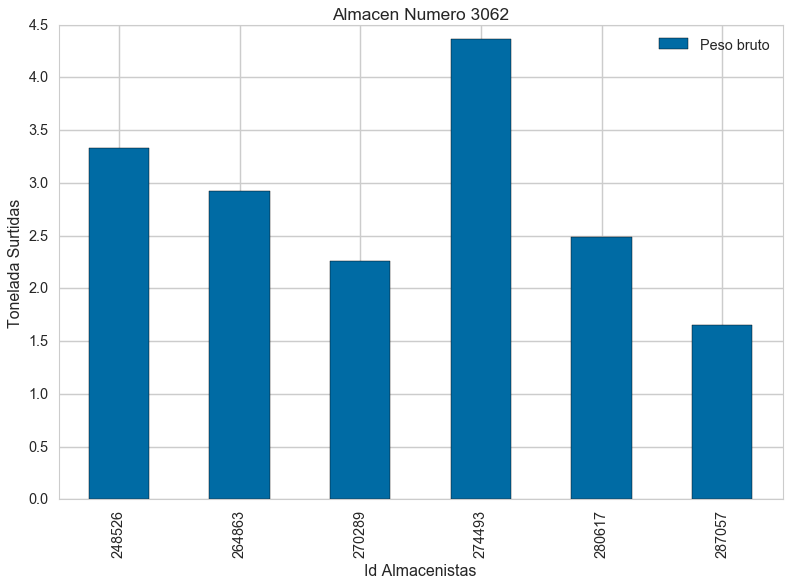

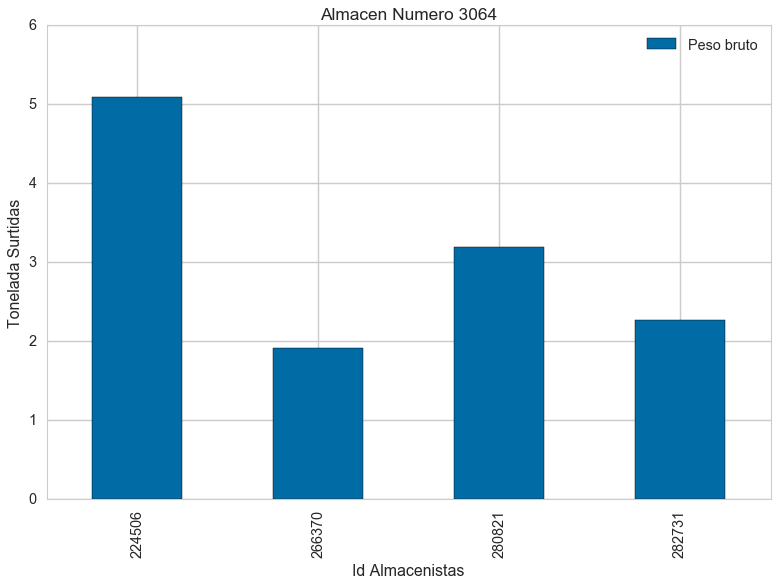

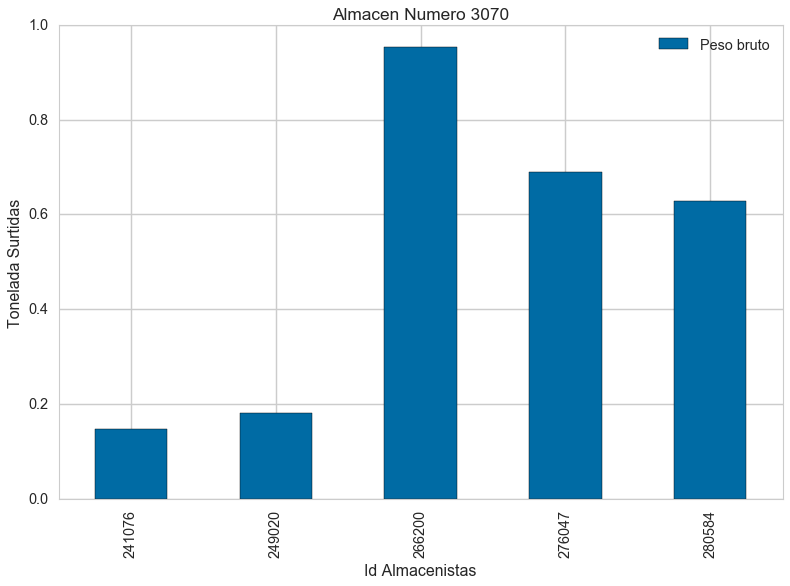

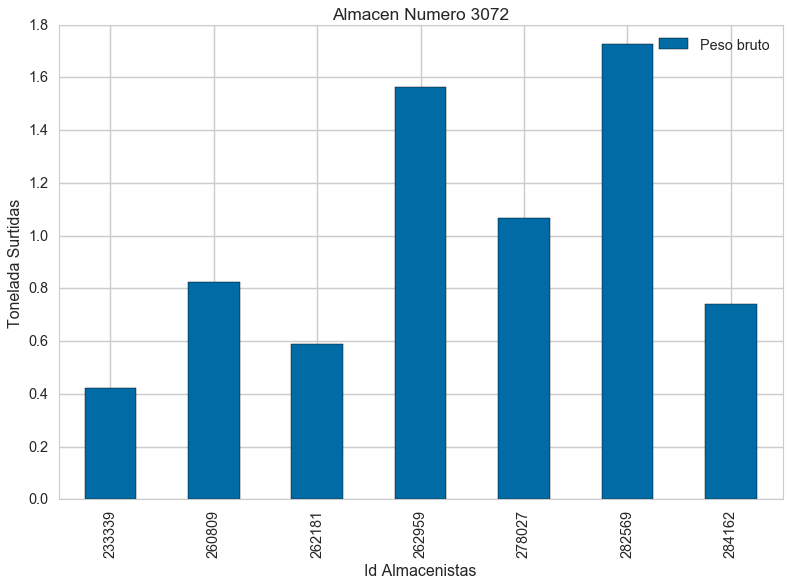

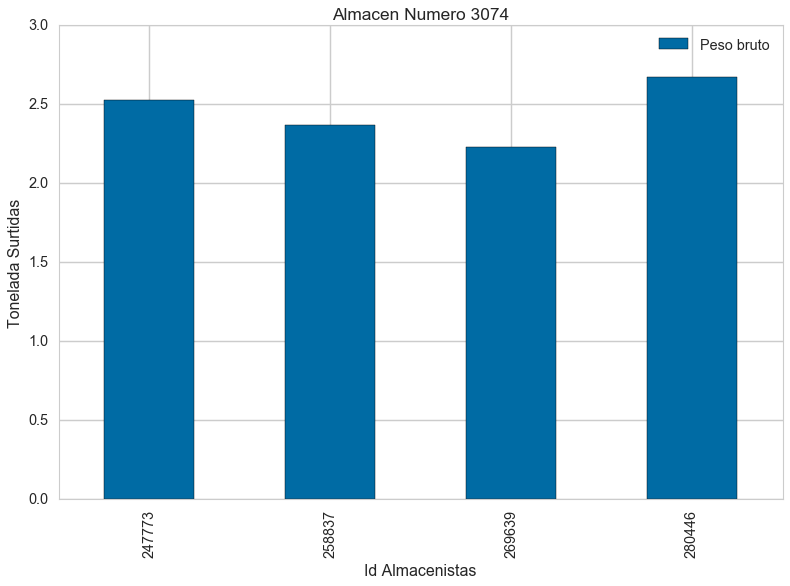

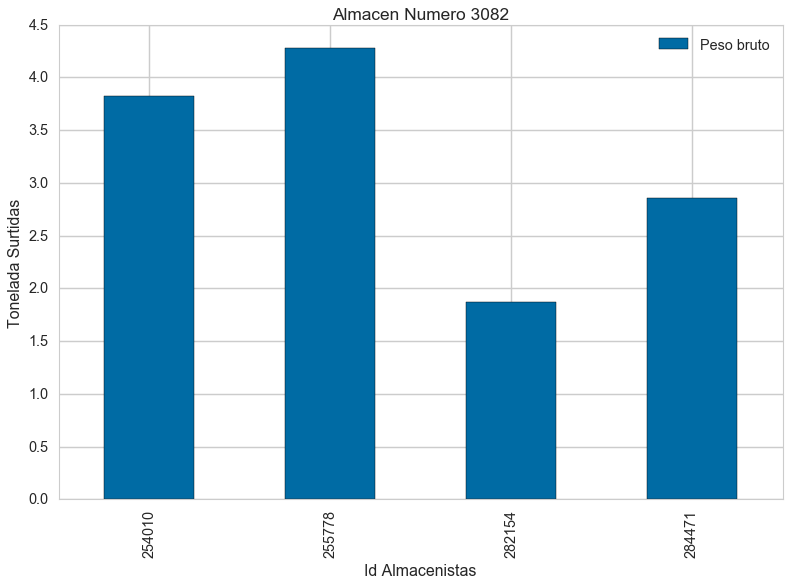

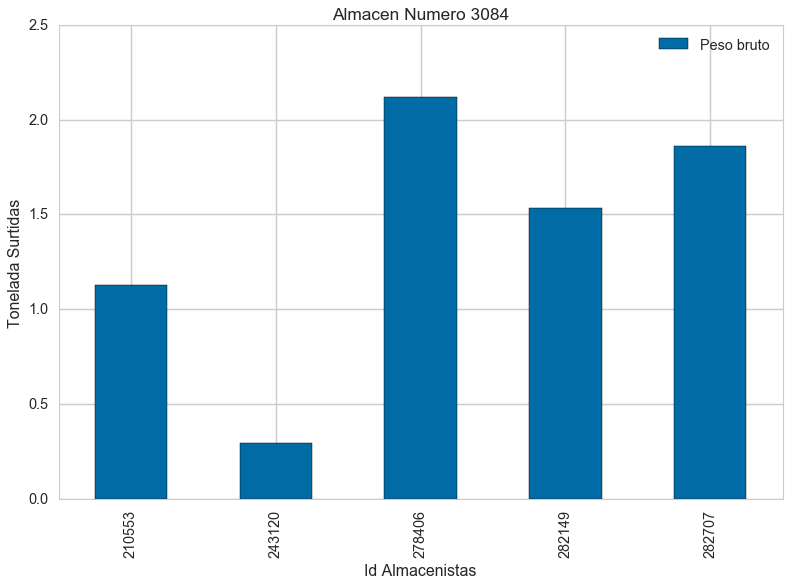

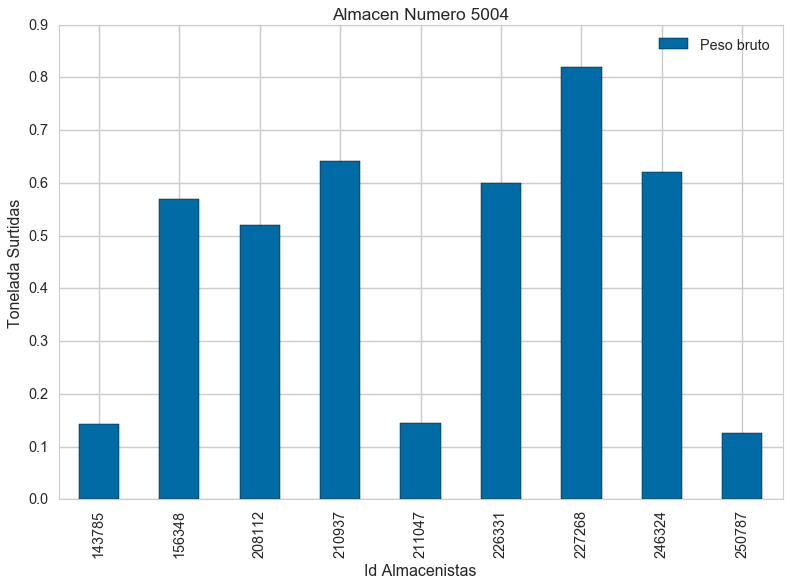

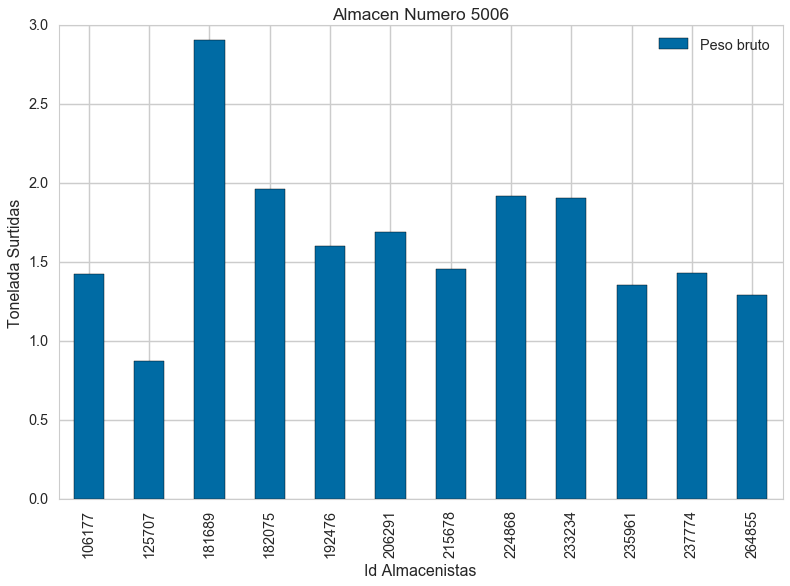

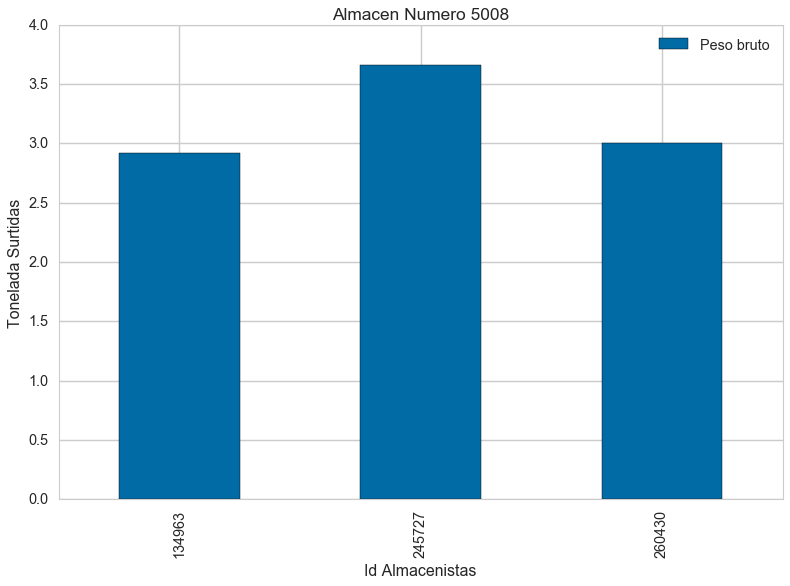

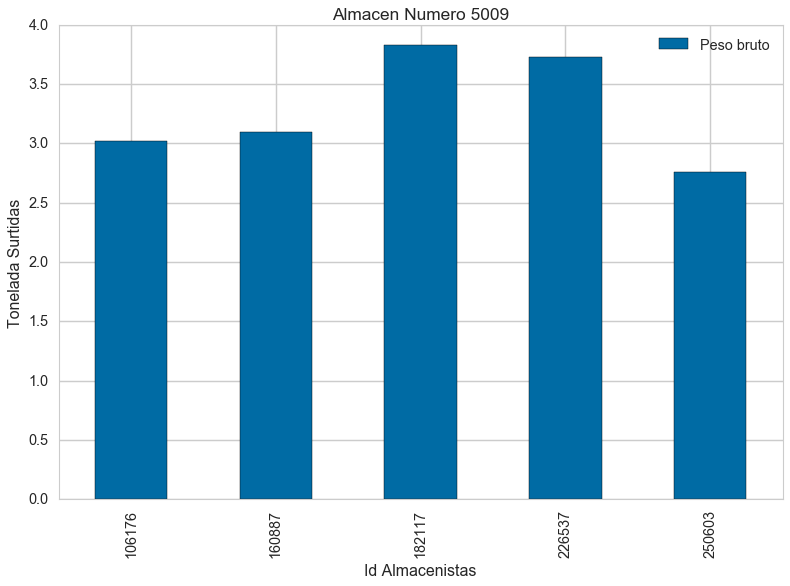

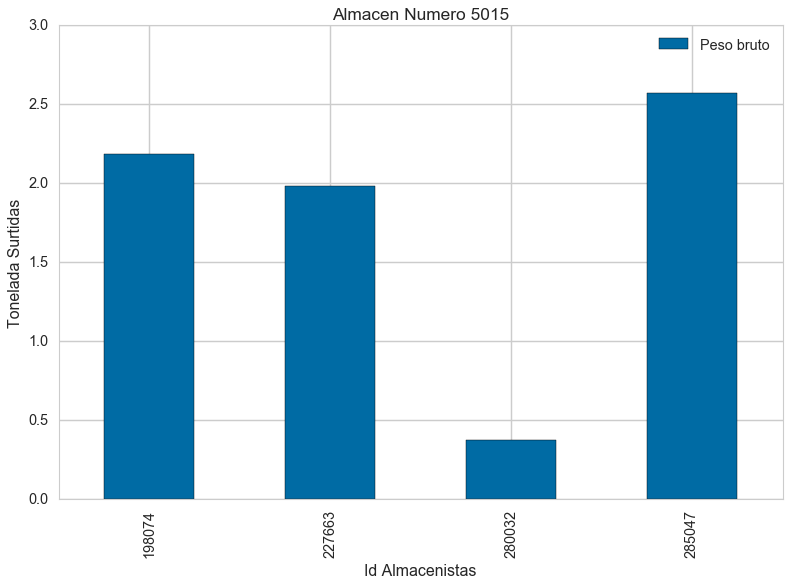

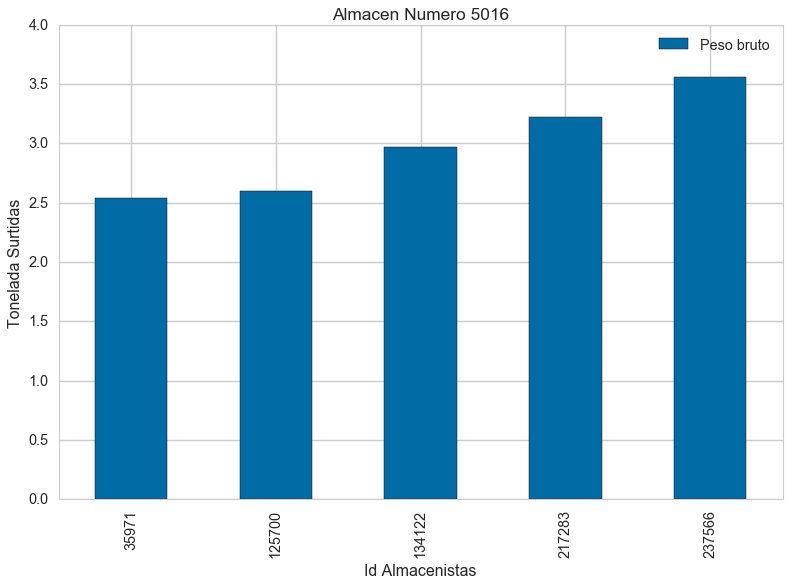

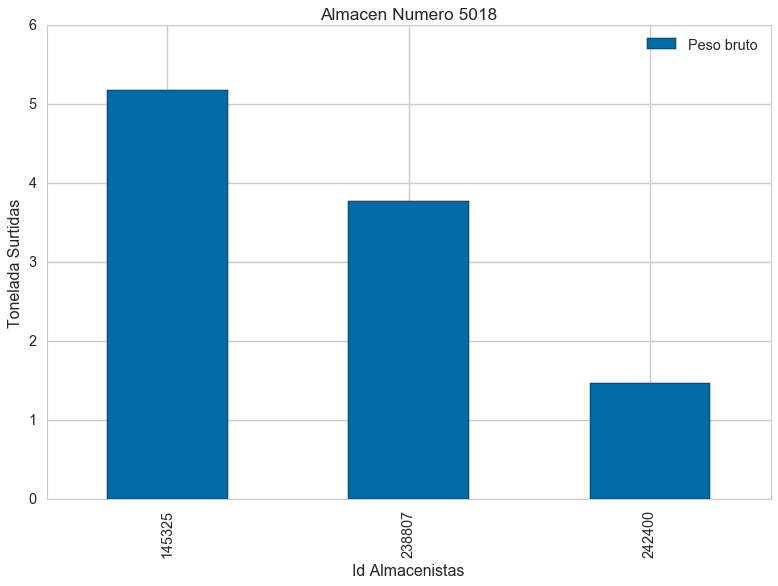

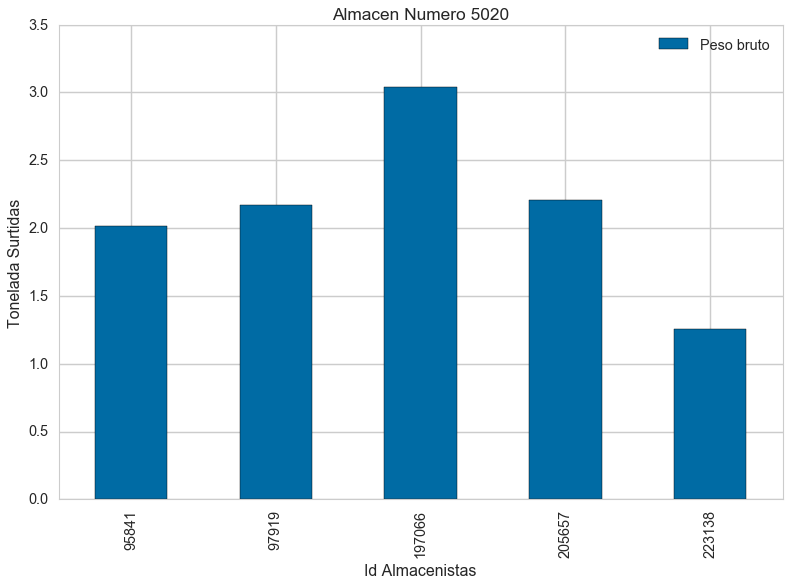

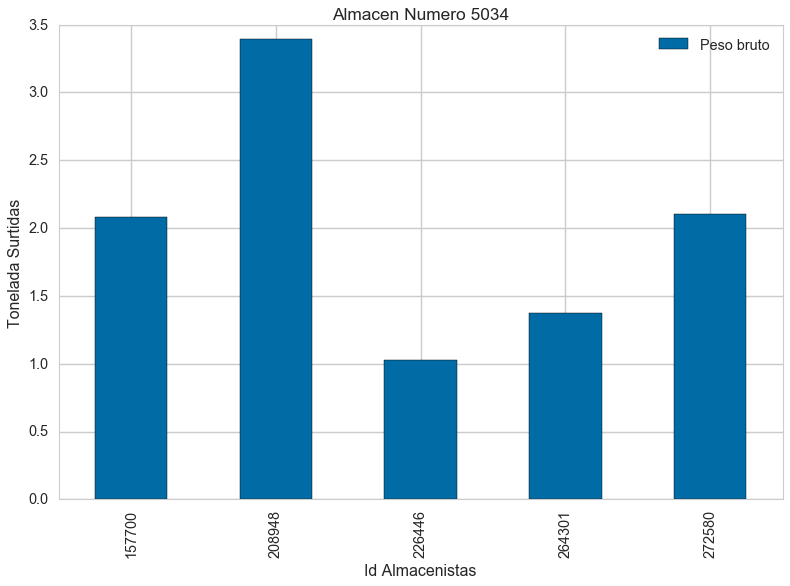

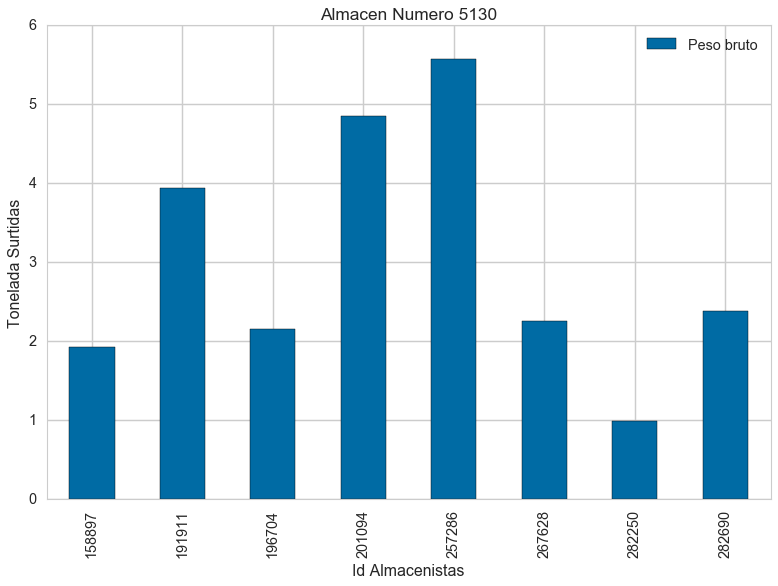

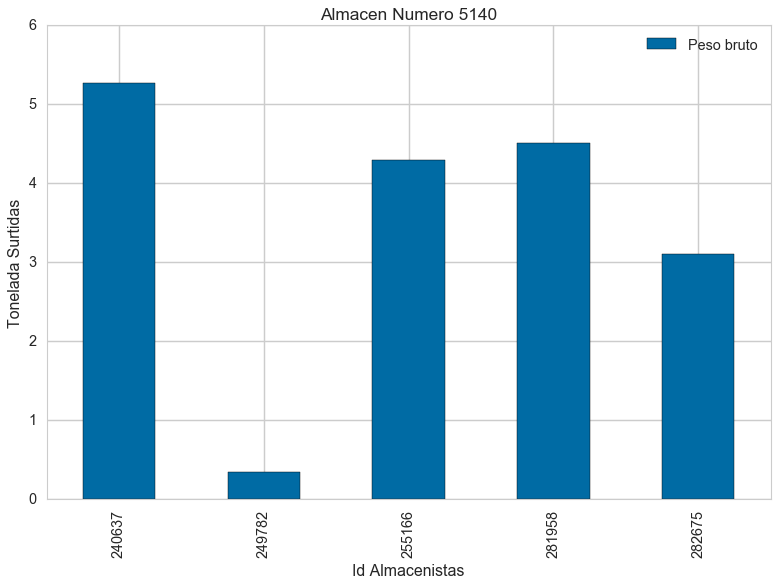

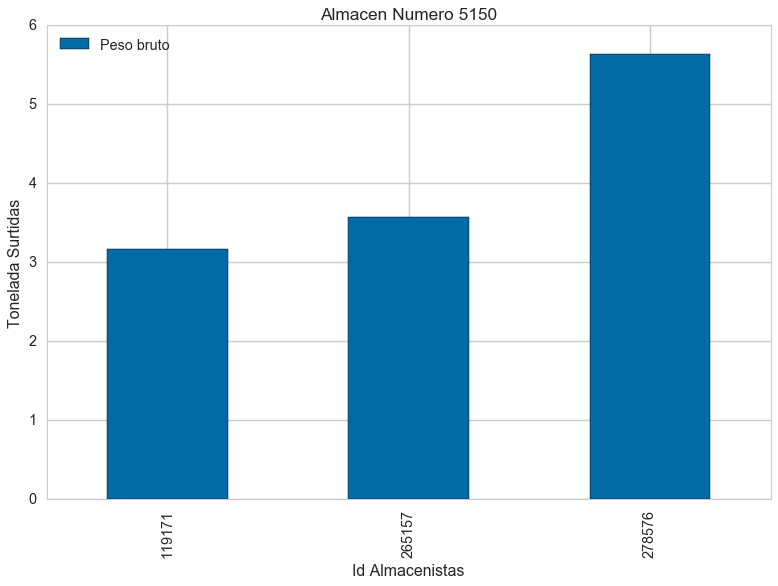

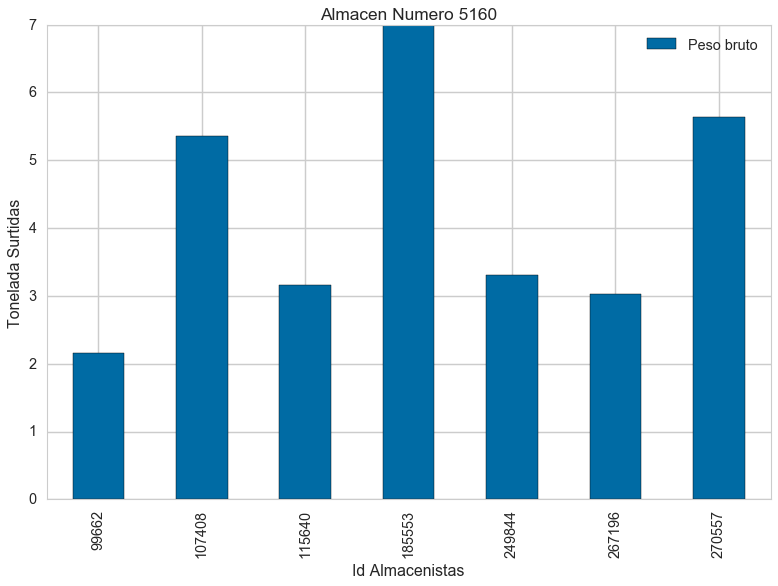

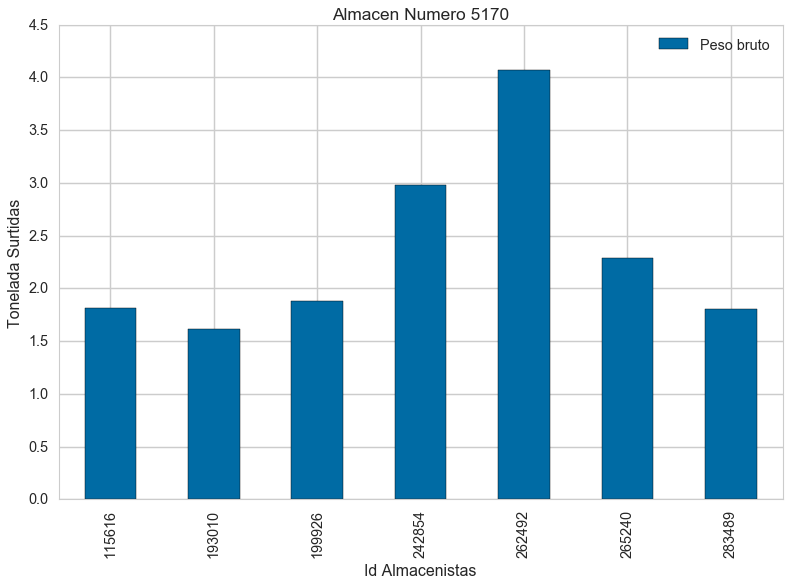

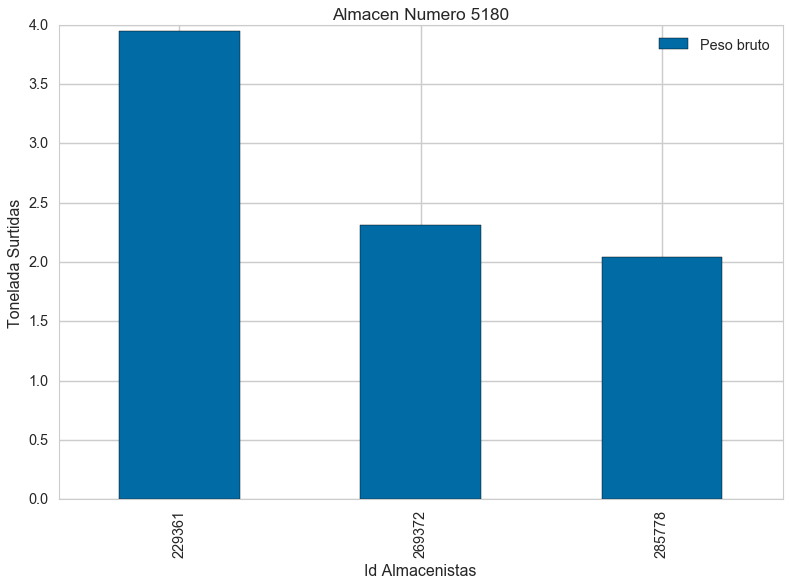

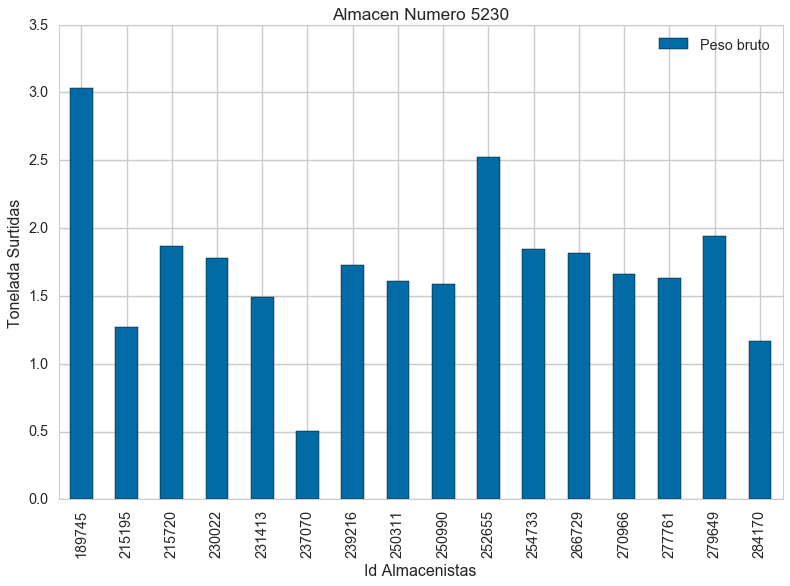

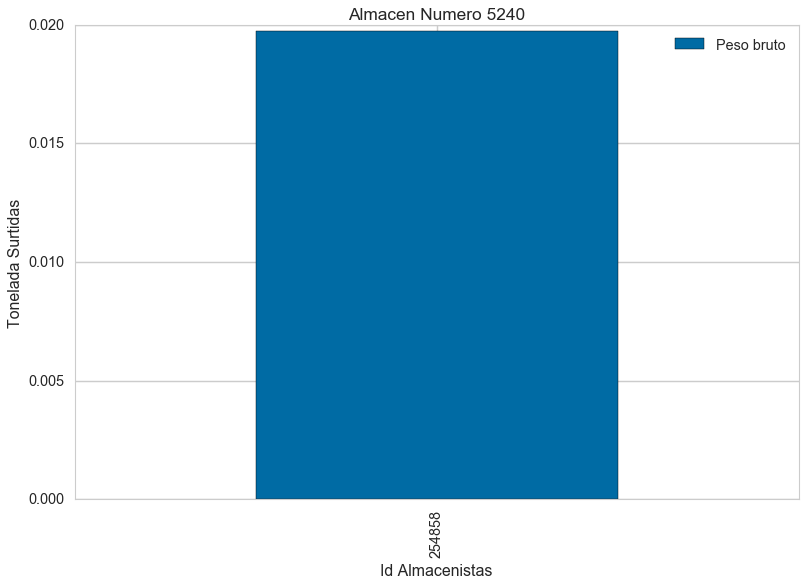

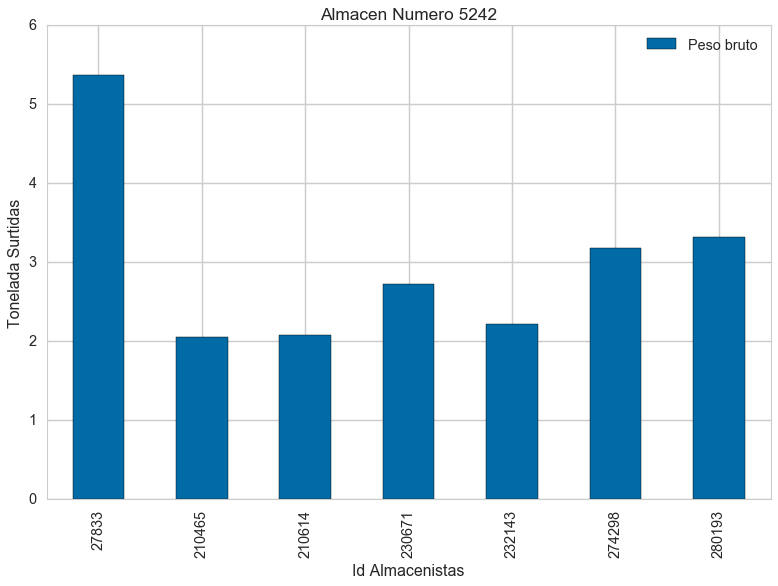

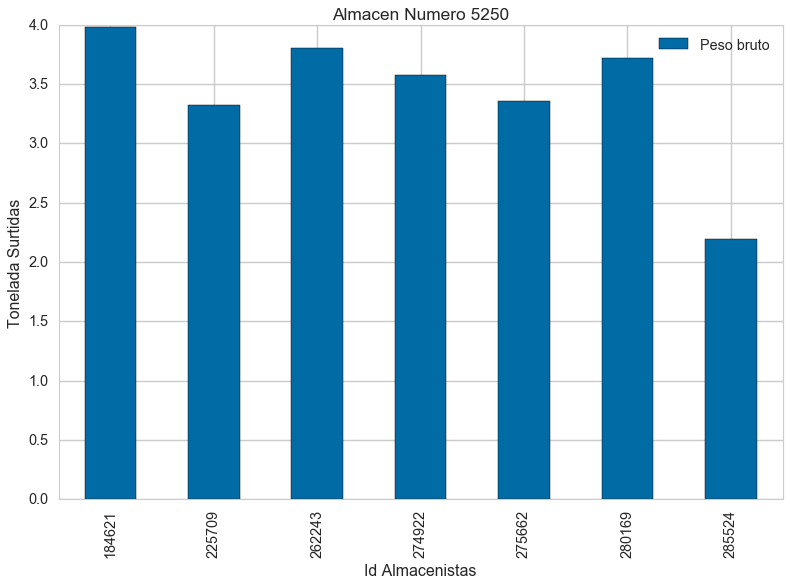

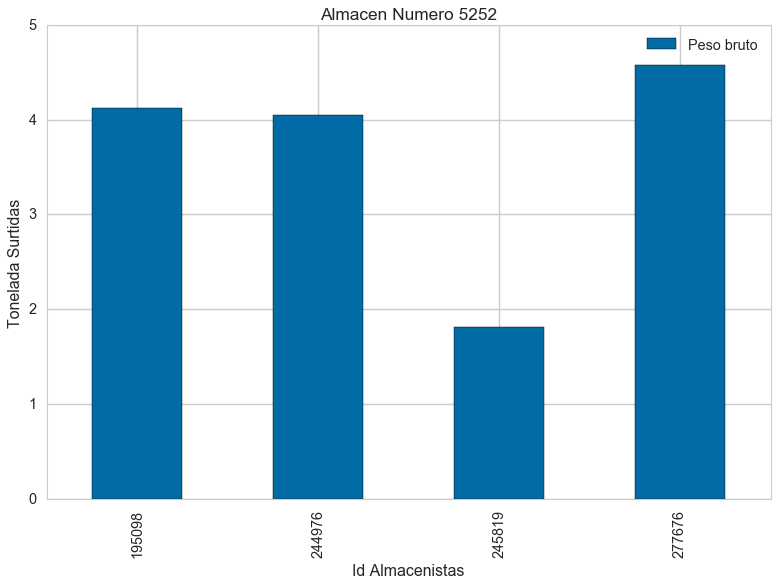

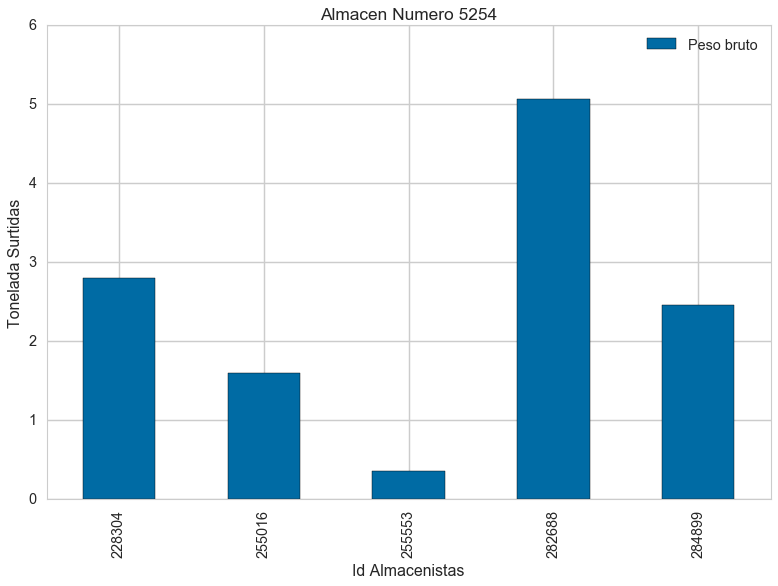

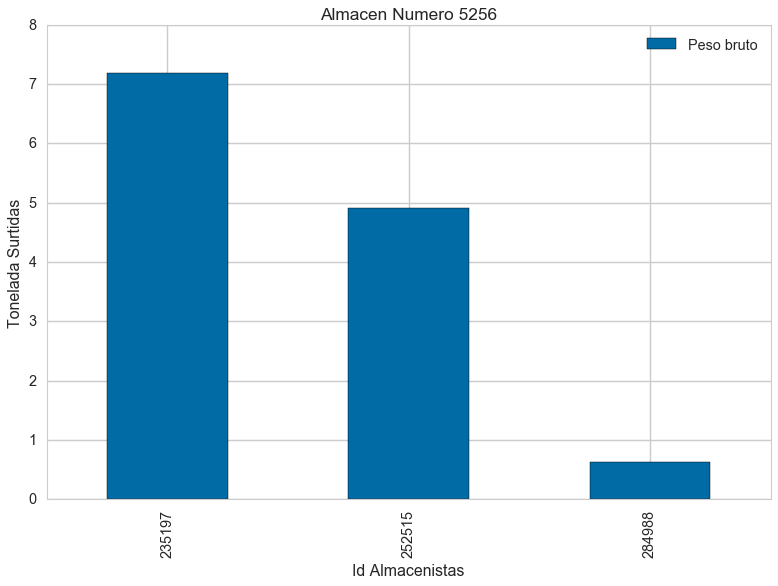

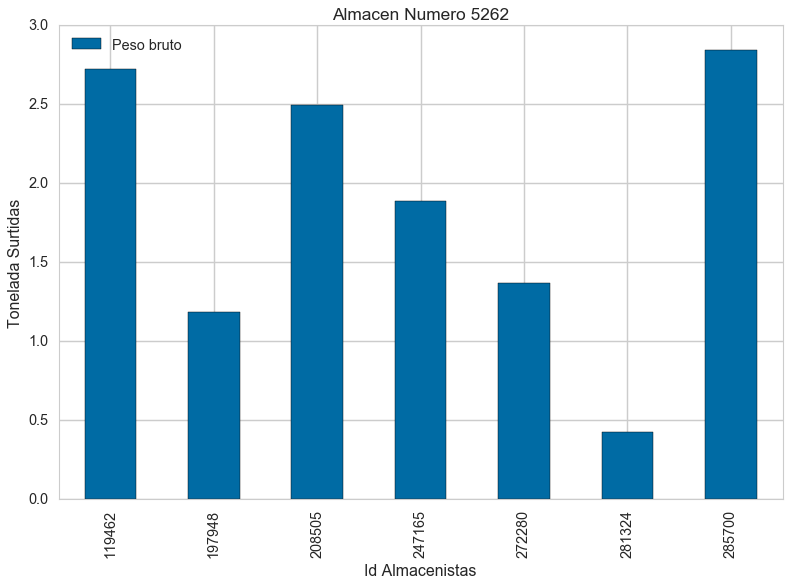

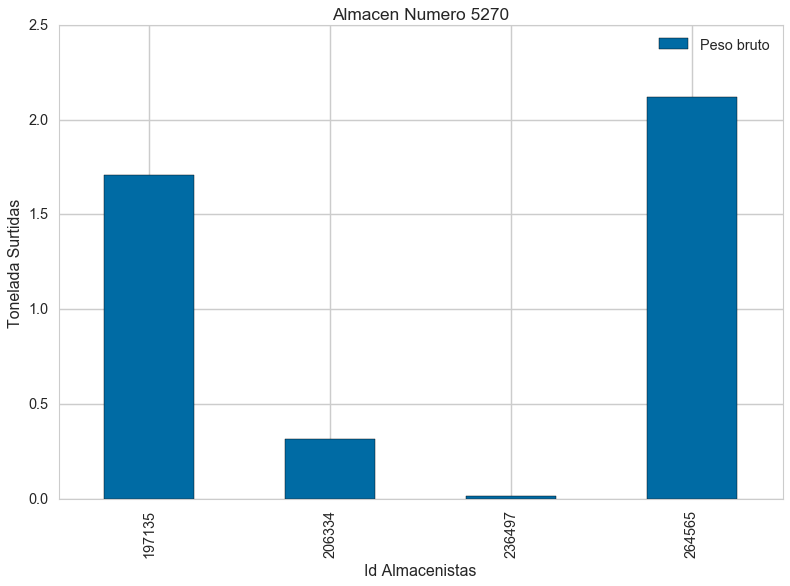

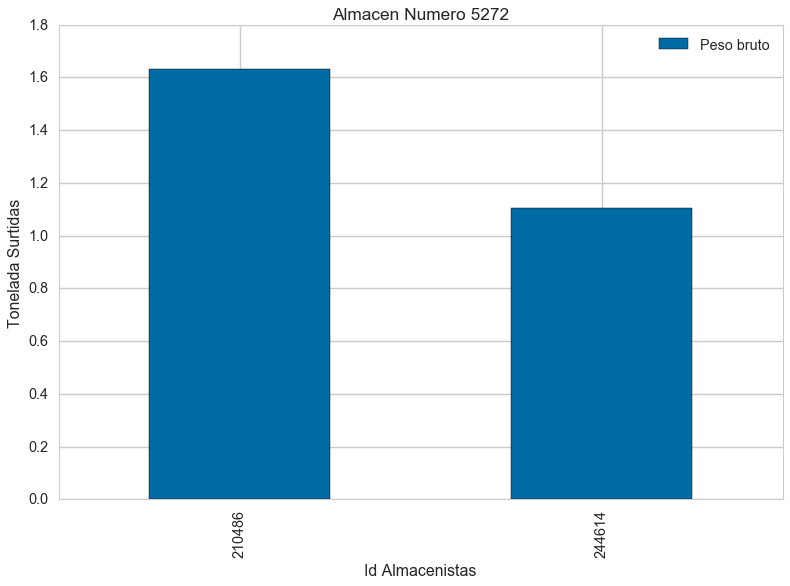

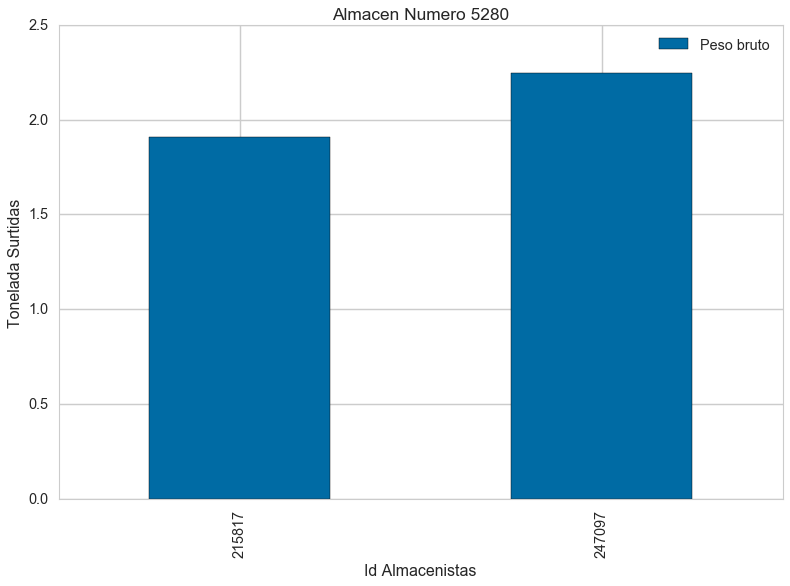

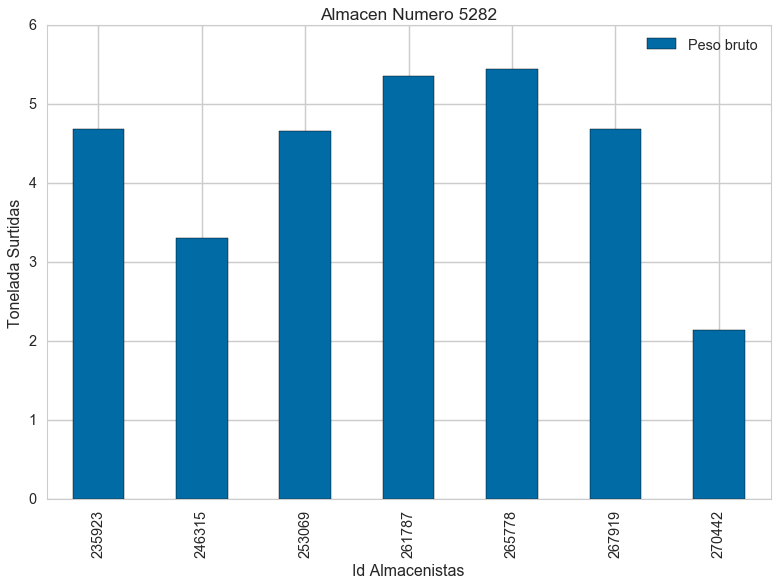

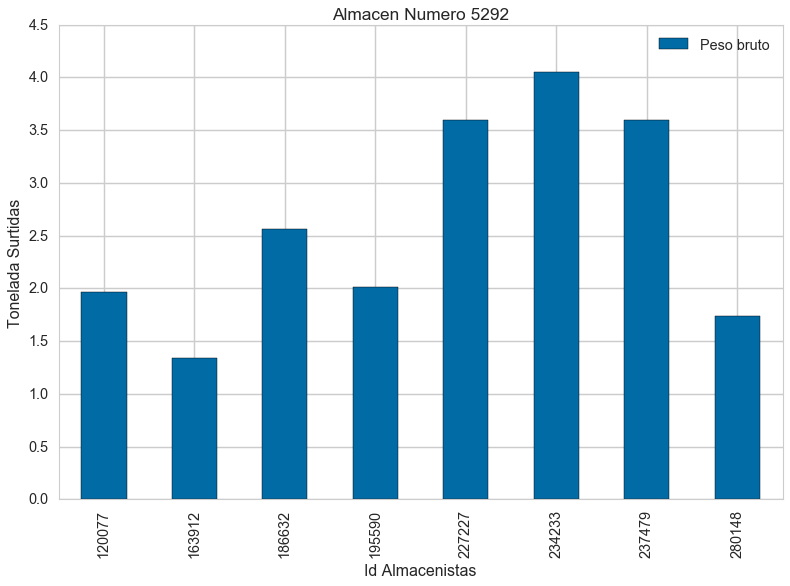

In [62]:
# Se construye la lista de almacenistas por centro y se grafica
for centro in lista_centros_alm:
    #almacenistas = df_pivot_por_almacenista.loc[centro].index.to_list()
    df_pivot_por_almacenista['sum'].loc[centro].plot.bar()
    plt.title('Almacen Numero {}'.format(centro))
    plt.xlabel('Id Almacenistas')
    plt.ylabel('Tonelada Surtidas')

# Seleccion de Centro Individual a graficar y grabar imagen

In [63]:
# Funcion para crear la grafica individual
def centro_almacenistas(num_centro, imagen):
        df_pivot_por_almacenista['sum'].loc[num_centro].plot.bar()
        plt.title('Almacen Numero {}'.format(num_centro))
        plt.xlabel('Id Almacenistas')
        plt.ylabel('Tonelada Surtidas')
        if imagen == 'S':
            file_name = f'Almacen_{num_centro}.jpg'
            plt.savefig(file_name)
            print(f'File {file_name} creado')
        plt.show()

Centro a Graficar: [0=Salir]  1006
Grabar Imagen en jpg? [S/N]  S
File Almacen_1006.jpg creado


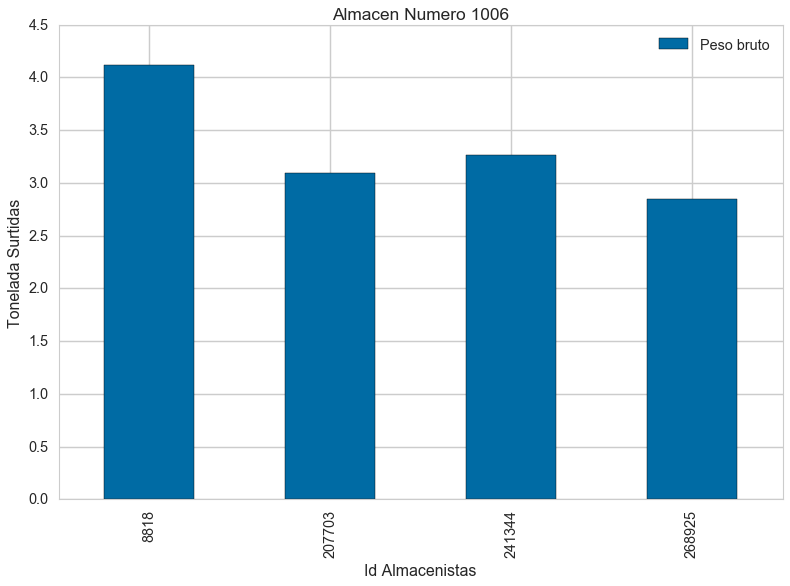

Desea graficar otro centro? [S=Continúa - Otra Tecla=Salir]


In [65]:
# Funcionalidad para crear un centro individual o varios a la vez
continuar = "S"
while continuar == "S":
    centro_almacen = 0
    centro_almacen = int(input('Centro a Graficar: [0=Salir]  '))
    existe = centro_almacen in lista_centros_alm
    if centro_almacen == 0:
        print('Sesion Terminada')
        break
    elif existe == False:
            print("Centro no Existe ")
            continue
    else:
        imagen = input('Grabar Imagen en jpg? [S/N]  ').upper()
        if imagen != 'S':
            print('Opcion de Grabar Imagen no seleccionada')
        # Se llama a la funcion
        centro_almacenistas(centro_almacen, imagen)
    
    continuar = input('Desea graficar otro centro? [S=Continúa - Otra Tecla=Salir]').upper()